# 8. Segmentation

## <a name="C81">8.1 Sauvegarde dataframe finale <a>

In [474]:
df_model = df_final.copy()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_unique_id                  99441 non-null  object 
 1   customer_zip_code_prefix            99441 non-null  object 
 2   customer_city                       99441 non-null  object 
 3   customer_state                      99441 non-null  object 
 4   order_id                            96461 non-null  object 
 5   order_status                        96461 non-null  object 
 6   s1_duree_approbation                96461 non-null  float64
 7   s2_attente_prise_transport          96461 non-null  float64
 8   s3_duree_transport                  96461 non-null  float64
 9   s123_duree_attente_client           96461 non-null  float64
 10  retard_livraison                    96461 non-null  f

In [475]:
df_model.columns

Index(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status', 's1_duree_approbation',
       's2_attente_prise_transport', 's3_duree_transport',
       's123_duree_attente_client', 'retard_livraison',
       'retard_livraison_class', 'review_id', 'review_score', 'total_price',
       'geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state',
       'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'distance_customer_seller_km', 'Recency',
       'Frequency', 'Monetary', 'Monetary_mean', 'RFM_Score',
       'Customer_segment'],
      dtype='object')

## <a name="C8.2">8.2 Création des segmentations</a>

### <a name="C821">8.2.1 RFM</a>

In [476]:
# Selection des features
df_rfm = df_model[["Recency", "Frequency", "Monetary"]].copy()

# Suppression des lignes contenant au moins 1 NaN
df_rfm.dropna(axis=0, inplace=True)

df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    96667 non-null  float64
 1   Frequency  96667 non-null  float64
 2   Monetary   96667 non-null  float64
dtypes: float64(3)
memory usage: 3.0+ MB


In [477]:
# Standardisation (pas d'encodage car que des floats sont présents dans dataframe
std_scaled = preprocessing.StandardScaler()
df_rfm_scaled, std_scaled = standardisation(df_rfm, std_scaled)

Nous avons X de forme (96667, 3)


#### <a name="C8211">8.2.1.1 K-means++</a>

##### <a name="C82111">8.2.1.1.1 Choix du nombre de clusters</a>

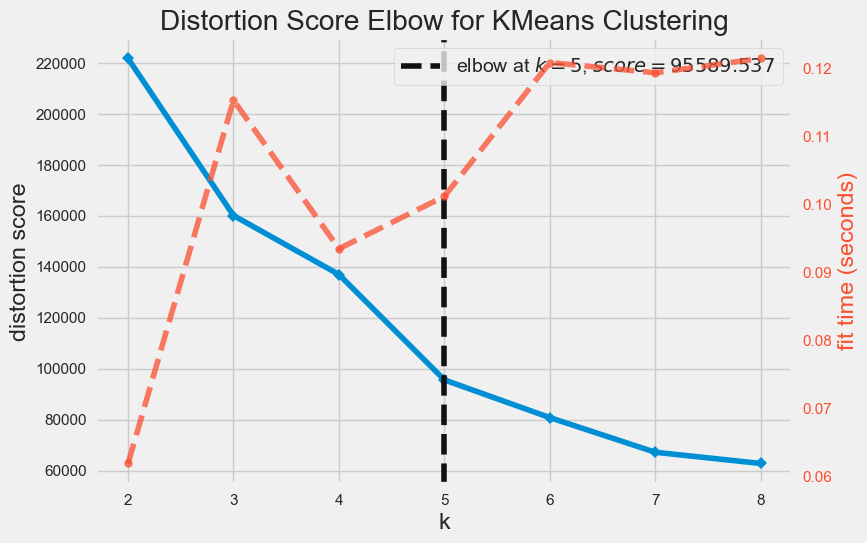

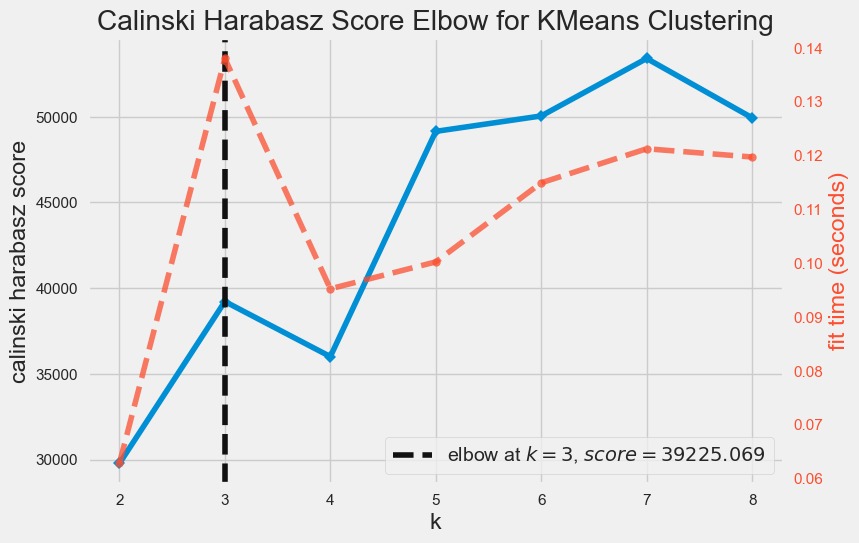

In [478]:
# Estimation du meilleur clusturing par 3 métriques

visualisation_coude(df_rfm_scaled, "distortion")
visualisation_coude(df_rfm_scaled, "calinski_harabasz")
# visualisation_coude(df_rfm_scaled,'silhouette')

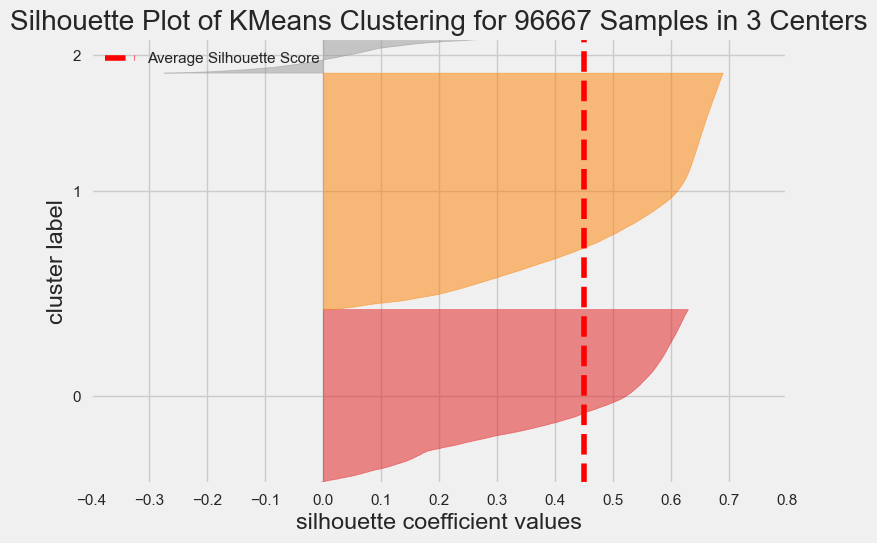

In [479]:
# Visualisation des silouhettes des clusters
# visualisation_silhouette(df_rfm_scaled,2)
visualisation_silhouette(df_rfm_scaled, 3)
# visualisation_silhouette(df_rfm_scaled,4)
# visualisation_silhouette(df_rfm_scaled,5)

##### <a name="C82112">8.2.1.1.2 Création du clustering </a>

In [480]:
# cluster_kmeanspp(df, nb_clusters)
kmspp = cluster_kmeanspp(df_rfm_scaled, 3)

# intégration des clusters dans la df d'origine avant transformation
df_rfm["cluster_rfm_kmpp"] = kmspp.labels_
df_rfm.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp
customer_id,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,0
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1


In [481]:
df_rfm["cluster_rfm_kmpp"] = df_rfm["cluster_rfm_kmpp"].astype("object")
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           96667 non-null  float64
 1   Frequency         96667 non-null  float64
 2   Monetary          96667 non-null  float64
 3   cluster_rfm_kmpp  96667 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.7+ MB


In [482]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfm, "Recency", "Frequency", "Monetary", "cluster_rfm_kmpp")

In [483]:
# Proportion de clusters
df_tmp = df_rfm["cluster_rfm_kmpp"].value_counts()
df_tmp = pd.DataFrame(df_tmp).reset_index()
df_tmp.set_axis(["cluster_rfm_kmpp", "qte"], axis="columns", inplace=True)
df_tmp.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\4185060180.py:4: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,cluster_rfm_kmpp,qte
0,1,51303
1,0,37910
2,2,7454


Text(0.5, 1.0, 'Répartition des clusters kmeans++ de RFM')

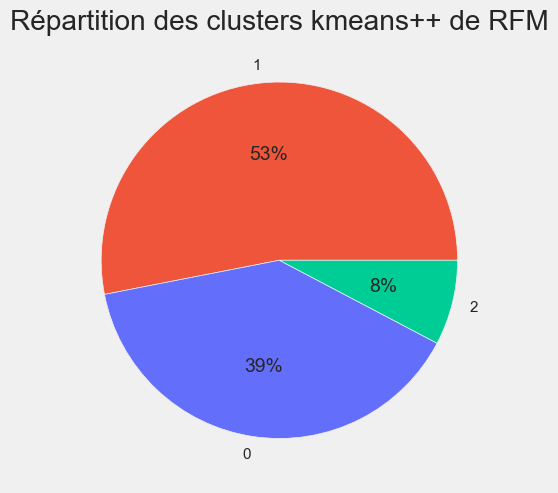

In [484]:
# colors = sns.color_palette('pastel')[0:5]
# 0 : #636EFA
# 1 : #EF553B
# 2 : #AB63FA
# 3 : #00CC96

colors = ["#EF553B", "#636EFA", "#00CC96"]
plt.pie(
    df_tmp["qte"], labels=df_tmp["cluster_rfm_kmpp"], colors=colors, autopct="%.0f%%"
)
plt.title("Répartition des clusters kmeans++ de RFM")

In [485]:
df_tmp = df_rfm[["Recency", "Frequency", "Monetary", "cluster_rfm_kmpp"]]
df_tmp.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp
customer_id,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,0
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1


<AxesSubplot: title={'center': 'Récence par cluster'}, xlabel='cluster_rfm_kmpp', ylabel='Recency'>

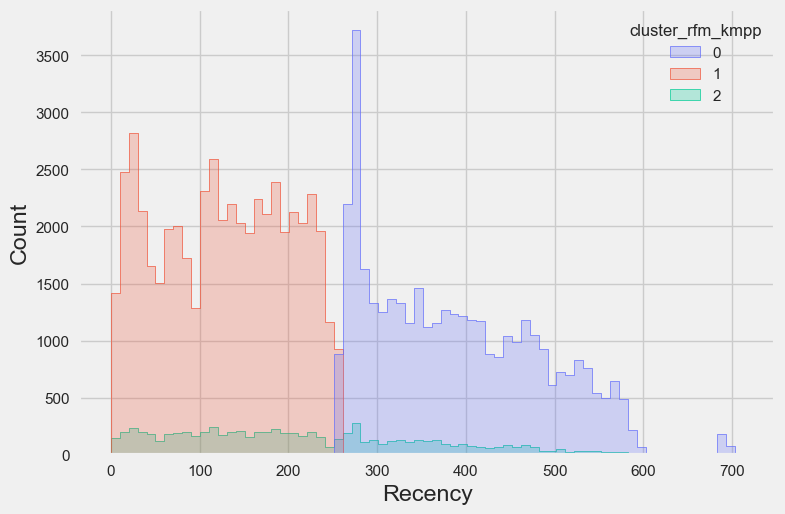

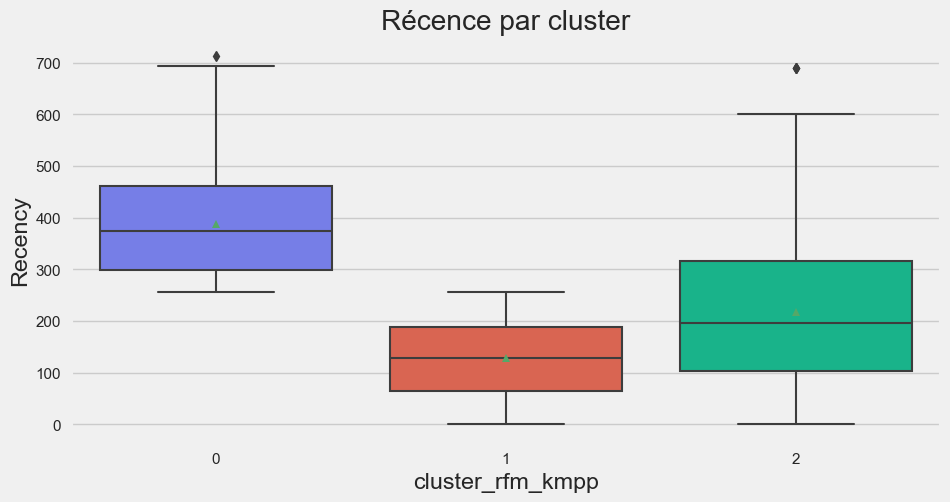

In [486]:
sns.histplot(
    data=df_tmp,
    x="Recency",
    hue="cluster_rfm_kmpp",
    element="step",
    kde=False,
    palette=["#636EFA", "#EF553B", "#00CC96"],
)

plt.figure(figsize=(10, 5))
plt.title("Récence par cluster")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfm_kmpp",
    y="Recency",
    data=df_tmp,
    showmeans=True,
    palette=["#636EFA", "#EF553B", "#00CC96"],
)

<AxesSubplot: title={'center': 'Fréquence par cluster'}, xlabel='cluster_rfm_kmpp', ylabel='Frequency'>

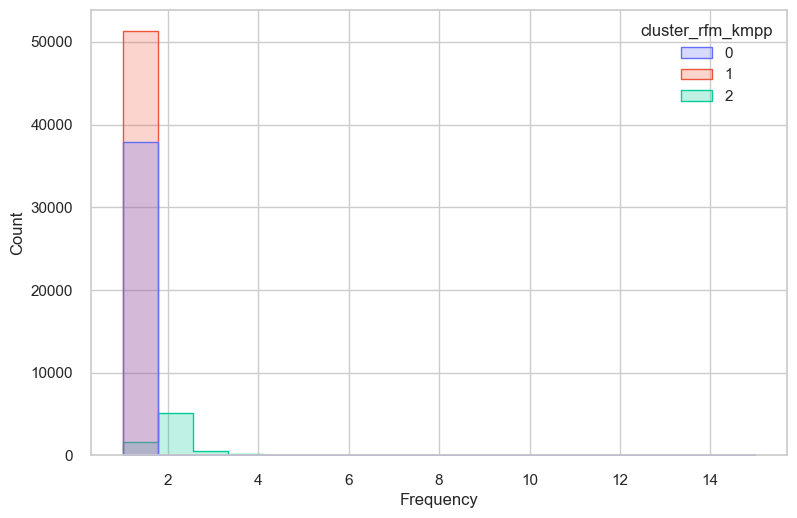

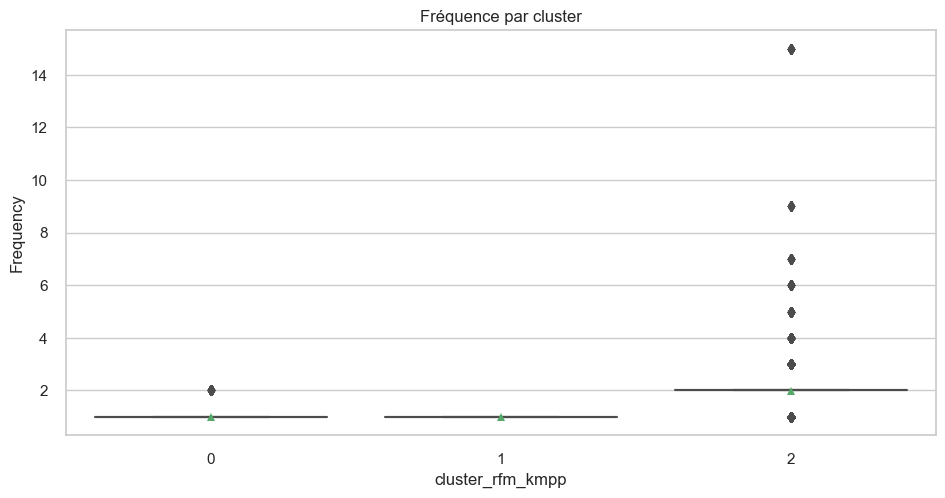

In [487]:
sns.histplot(
    data=df_tmp,
    x="Frequency",
    hue="cluster_rfm_kmpp",
    element="step",
    kde=False,
    palette=["#636EFA", "#EF553B", "#00CC96"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence par cluster")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfm_kmpp", y="Frequency", data=df_tmp, showmeans=True)

<AxesSubplot: title={'center': 'Fréquence (=1) par cluster'}, xlabel='cluster_rfm_kmpp', ylabel='Frequency'>

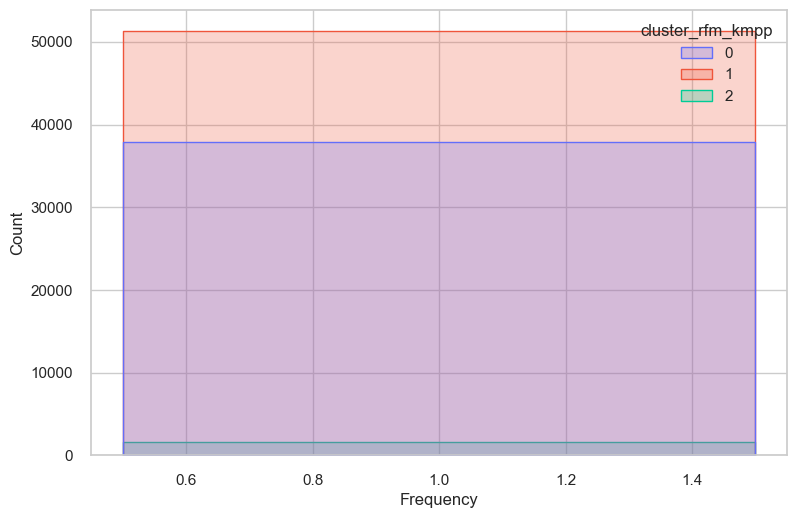

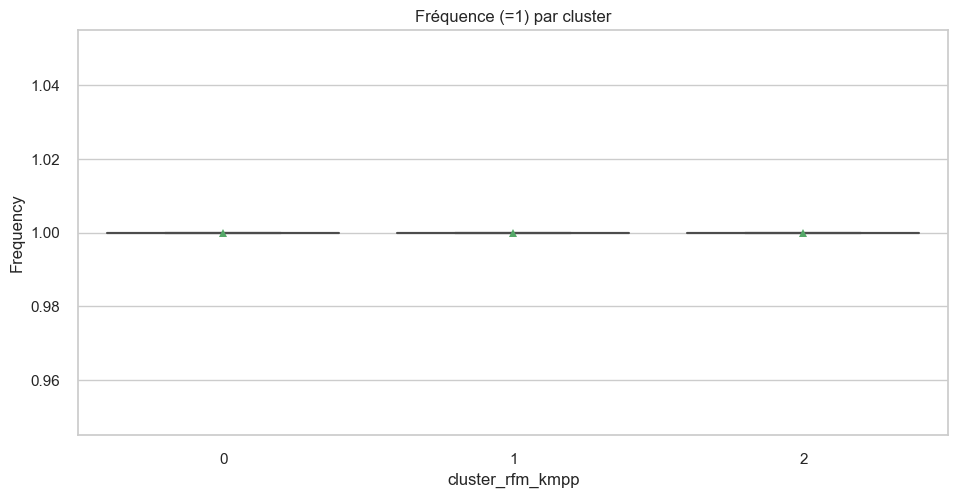

In [488]:
df_tmp2 = df_tmp.loc[df_tmp["Frequency"] == 1]
sns.histplot(
    data=df_tmp2,
    x="Frequency",
    hue="cluster_rfm_kmpp",
    element="step",
    kde=False,
    palette=["#636EFA", "#EF553B", "#00CC96"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence (=1) par cluster")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfm_kmpp", y="Frequency", data=df_tmp2, showmeans=True)

<AxesSubplot: title={'center': 'Fréquence par cluster'}, xlabel='cluster_rfm_kmpp', ylabel='Monetary'>

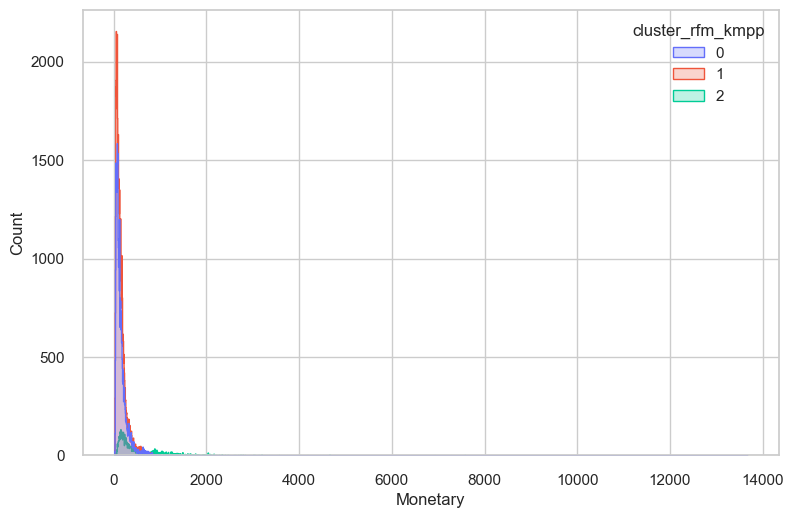

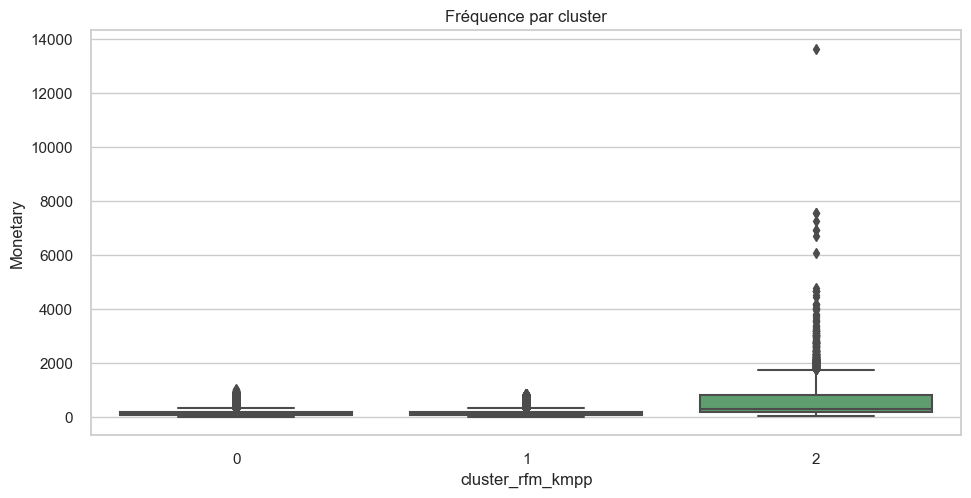

In [489]:
sns.histplot(
    data=df_tmp,
    x="Monetary",
    hue="cluster_rfm_kmpp",
    element="step",
    kde=False,
    palette=["#636EFA", "#EF553B", "#00CC96"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence par cluster")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfm_kmpp", y="Monetary", data=df_tmp, showmeans=False)

<AxesSubplot: title={'center': 'Monetary (<600) par cluster'}, xlabel='cluster_rfm_kmpp', ylabel='Monetary'>

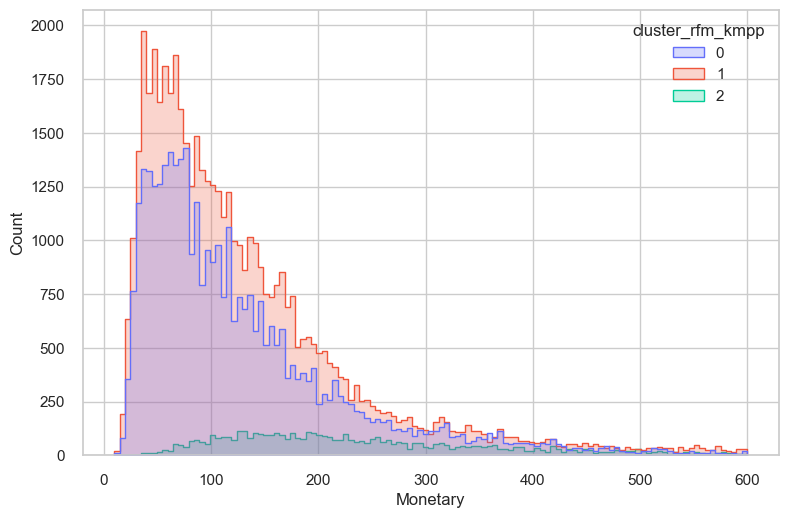

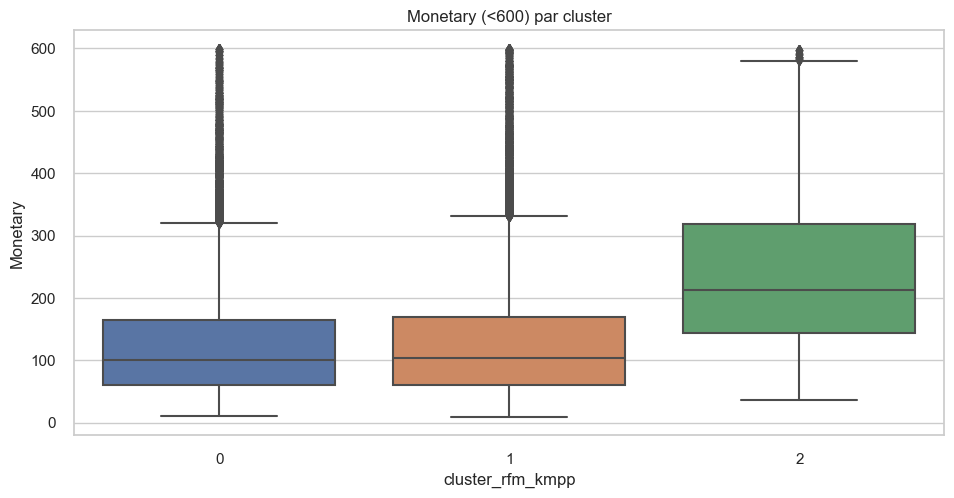

In [490]:
df_tmp2 = df_tmp.loc[df_tmp["Monetary"] < 600]
sns.histplot(
    data=df_tmp2,
    x="Monetary",
    hue="cluster_rfm_kmpp",
    element="step",
    kde=False,
    palette=["#636EFA", "#EF553B", "#00CC96"],
)

plt.figure(figsize=(10, 5))
plt.title("Monetary (<600) par cluster")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfm_kmpp", y="Monetary", data=df_tmp2, showmeans=False)

###### <a name="C821121">8.2.1.1.2.1 Clustering 0 </a>

In [491]:
df_tmp_c0 = df_tmp.loc[df_tmp["cluster_rfm_kmpp"] == 0]
df_tmp_c0.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp
customer_id,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,0
5e274e7a0c3809e14aba7ad5aae0d407,285.0,1.0,36.01,0
9fb35e4ed6f0a14a4977cd9aea4042bb,274.0,1.0,40.40,0
b2d1536598b73a9abd18e0d75d92f0a3,354.0,1.0,117.31,0
9b8ce803689b3562defaad4613ef426f,475.0,1.0,102.03,0


moy:
 387.32569242943816
med:
 375.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 96.20820149121896
Var:
 9256.018034174986
Coefficient de variation CV : 0.2483942384909933
count    37910.000000
mean       387.325692
std         96.209470
min        257.000000
25%        299.000000
50%        375.000000
75%        462.000000
max        713.000000
Name: Recency, dtype: float64


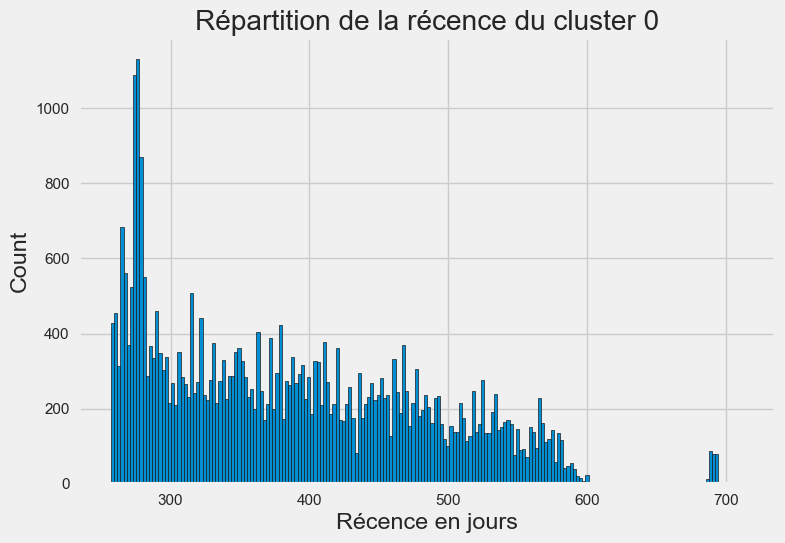

In [492]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["Recency"].mean())
print("med:\n", df_tmp_c0["Recency"].median())
print("mod:\n", df_tmp_c0["Recency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["Recency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["Recency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["Recency"].std() / df_tmp_c0["Recency"].mean(),
)

print(df_tmp_c0["Recency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["Recency"], edgecolor="k", bins=200)
plt.title("Répartition de la récence du cluster 0")
plt.xlabel("Récence en jours")
plt.ylabel("Count");

moy:
 1.0013716697441308
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.03701065071359692
Var:
 0.0013697882662438718
Coefficient de variation CV : 0.036960441342498485
count    37910.000000
mean         1.001372
std          0.037011
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Frequency, dtype: float64


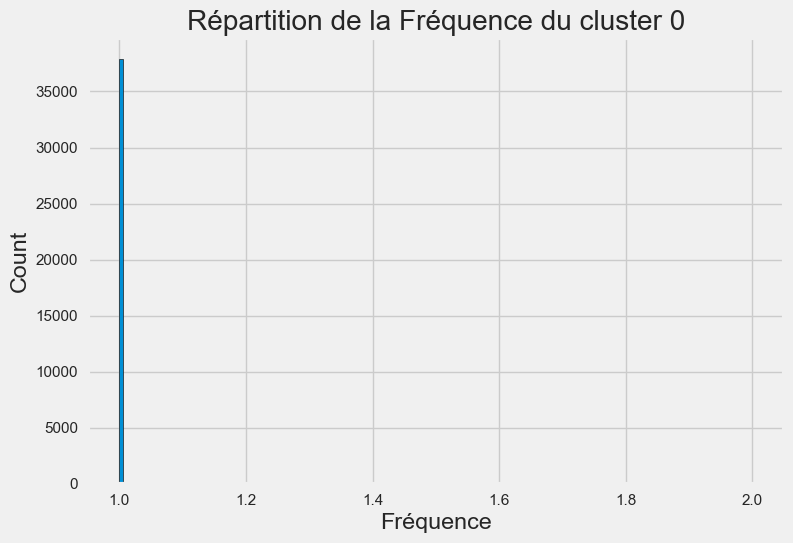

In [493]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["Frequency"].mean())
print("med:\n", df_tmp_c0["Frequency"].median())
print("mod:\n", df_tmp_c0["Frequency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["Frequency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["Frequency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["Frequency"].std() / df_tmp_c0["Frequency"].mean(),
)

print(df_tmp_c0["Frequency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["Frequency"], edgecolor="k", bins=200)
plt.title("Répartition de la Fréquence du cluster 0")
plt.xlabel("Fréquence")
plt.ylabel("Count");

moy:
 140.43089053020313
med:
 102.155
mod:
 0    77.57
Name: Monetary, dtype: float64
Ecart type:
 125.83631750589059
Var:
 15834.778803443305
Coefficient de variation CV : 0.8960847341738012
count    37910.000000
mean       140.430891
std        125.837977
min         10.070000
25%         61.590000
50%        102.155000
75%        169.937500
max       1047.320000
Name: Monetary, dtype: float64


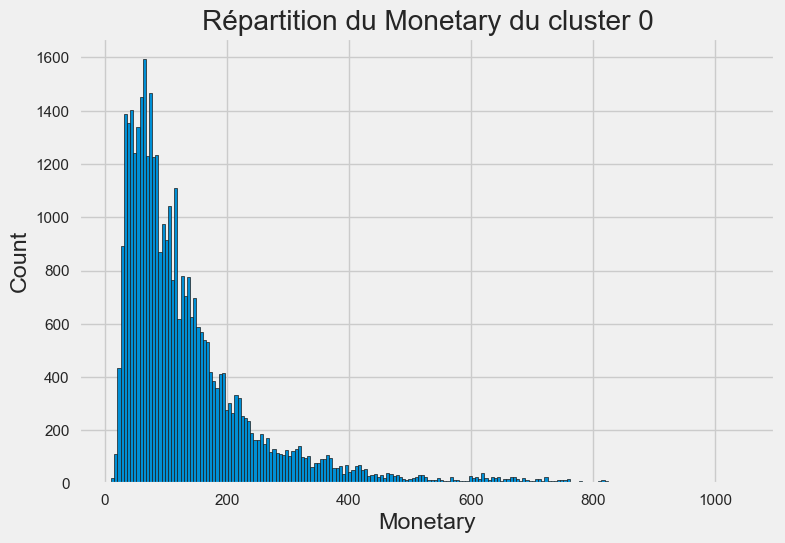

In [494]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["Monetary"].mean())
print("med:\n", df_tmp_c0["Monetary"].median())
print("mod:\n", df_tmp_c0["Monetary"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["Monetary"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["Monetary"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["Monetary"].std() / df_tmp_c0["Monetary"].mean(),
)

print(df_tmp_c0["Monetary"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["Monetary"], edgecolor="k", bins=200)
plt.title("Répartition du Monetary du cluster 0")
plt.xlabel("Monetary")
plt.ylabel("Count");

###### <a name="C821122">8.2.1.1.2.2 Clustering 1 </a>

In [495]:
df_tmp_c1 = df_tmp.loc[df_tmp["cluster_rfm_kmpp"] == 1]
df_tmp_c1.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp
customer_id,,,,
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1
fd826e7cf63160e536e0908c76c3f441,191.0,1.0,22.77,1


moy:
 127.4349453248348
med:
 128.0
mod:
 0    105.0
Name: Recency, dtype: float64
Ecart type:
 72.49674904241188
Var:
 5255.778621718448
Coefficient de variation CV : 0.5688977652293017
count    51303.000000
mean       127.434945
std         72.497456
min          0.000000
25%         64.000000
50%        128.000000
75%        189.000000
max        257.000000
Name: Recency, dtype: float64


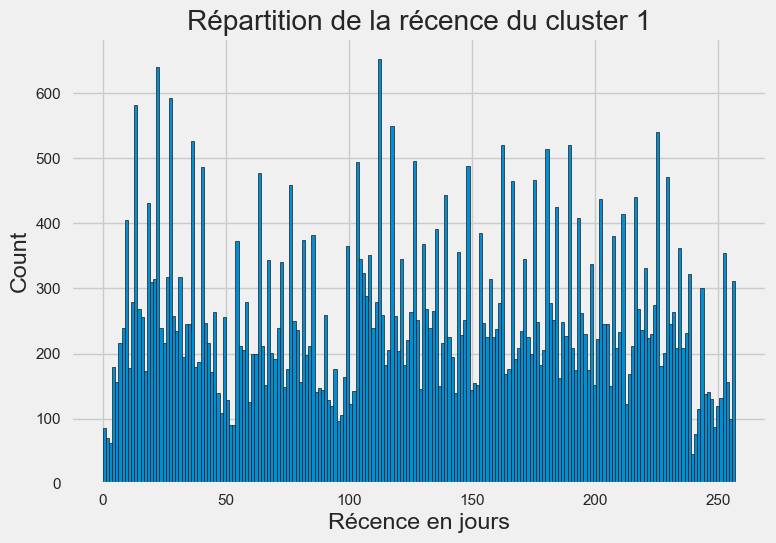

In [496]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["Recency"].mean())
print("med:\n", df_tmp_c1["Recency"].median())
print("mod:\n", df_tmp_c1["Recency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["Recency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["Recency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["Recency"].std() / df_tmp_c1["Recency"].mean(),
)

print(df_tmp_c1["Recency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["Recency"], edgecolor="k", bins=200)
plt.title("Répartition de la récence du cluster 1")
plt.xlabel("Récence en jours")
plt.ylabel("Count");

moy:
 1.0
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.0
Var:
 0.0
Coefficient de variation CV : 0.0
count    51303.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64


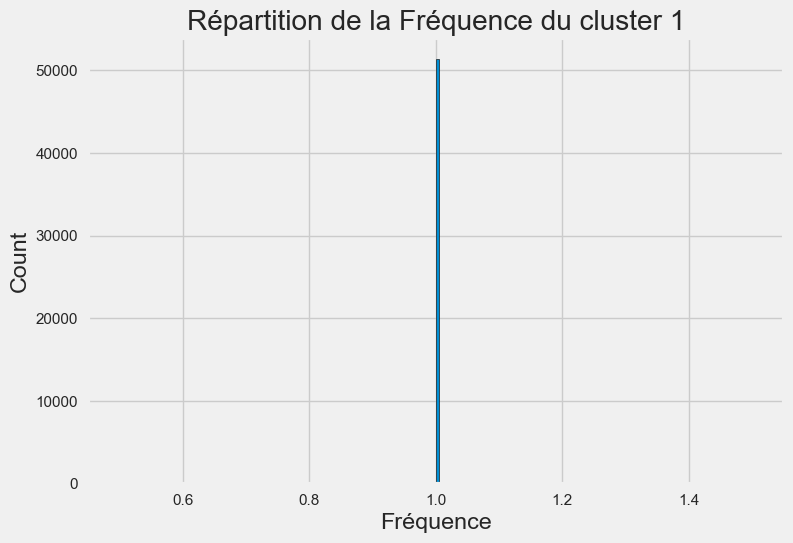

In [497]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["Frequency"].mean())
print("med:\n", df_tmp_c1["Frequency"].median())
print("mod:\n", df_tmp_c1["Frequency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["Frequency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["Frequency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["Frequency"].std() / df_tmp_c1["Frequency"].mean(),
)

print(df_tmp_c1["Frequency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["Frequency"], edgecolor="k", bins=200)
plt.title("Répartition de la Fréquence du cluster 1")
plt.xlabel("Fréquence")
plt.ylabel("Count");

moy:
 139.07003079741926
med:
 104.59
mod:
 0    99.9
Name: Monetary, dtype: float64
Ecart type:
 119.26205699390674
Var:
 14223.438238417859
Coefficient de variation CV : 0.8575767090673292
count    51303.000000
mean       139.070031
std        119.263219
min          9.590000
25%         61.395000
50%        104.590000
75%        172.440000
max        862.080000
Name: Monetary, dtype: float64


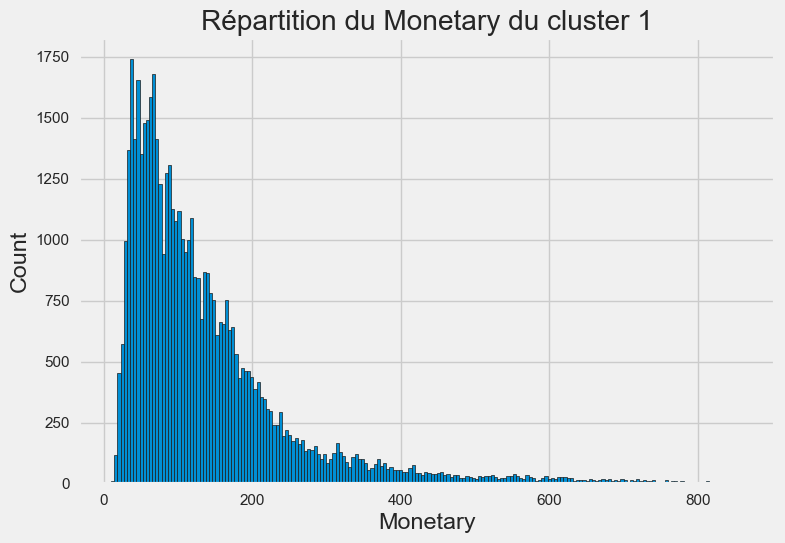

In [498]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["Monetary"].mean())
print("med:\n", df_tmp_c1["Monetary"].median())
print("mod:\n", df_tmp_c1["Monetary"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["Monetary"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["Monetary"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["Monetary"].std() / df_tmp_c1["Monetary"].mean(),
)

print(df_tmp_c1["Monetary"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["Monetary"], edgecolor="k", bins=200)
plt.title("Répartition du Monetary du cluster 1")
plt.xlabel("Monetary")
plt.ylabel("Count");

###### <a name="C821123">8.2.1.1.2.3 Clustering 2 </a>

In [499]:
df_tmp_c2 = df_tmp.loc[df_tmp["cluster_rfm_kmpp"] == 2]
df_tmp_c2.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp
customer_id,,,,
879864dab9bc3047522c92c82e1212b8,318.0,2.0,565.88,2
5adf08e34b2e993982a47070956c5c65,223.0,2.0,83.19,2
eabebad39a88bb6f5b52376faec28612,84.0,2.0,281.50,2
2d5831cb2dff7cdefba62e950ae3dc7b,133.0,2.0,113.83,2
b2bed119388167a954382cca36c4777f,440.0,2.0,437.78,2


moy:
 216.8137912530185
med:
 196.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 141.61819674515905
Var:
 20055.713649350575
Coefficient de variation CV : 0.653222732553812
count    7454.000000
mean      216.813791
std       141.627697
min         0.000000
25%       103.000000
50%       196.000000
75%       315.750000
max       690.000000
Name: Recency, dtype: float64


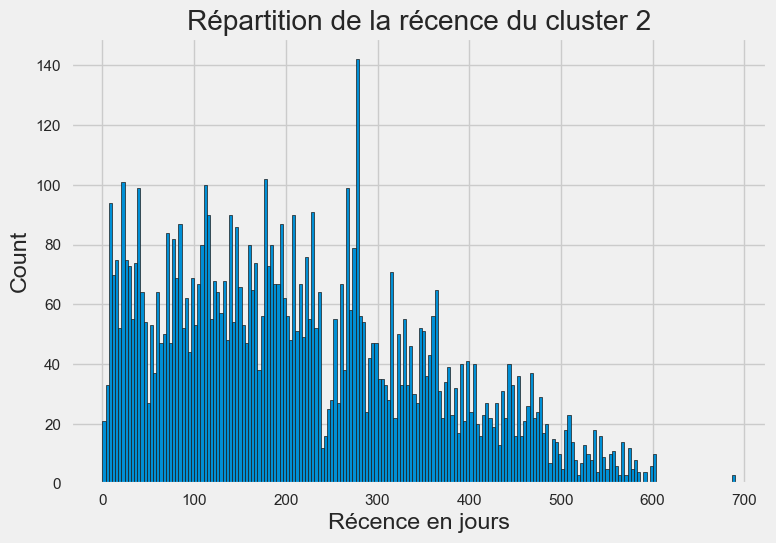

In [500]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["Recency"].mean())
print("med:\n", df_tmp_c2["Recency"].median())
print("mod:\n", df_tmp_c2["Recency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["Recency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["Recency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["Recency"].std() / df_tmp_c2["Recency"].mean(),
)

print(df_tmp_c2["Recency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["Recency"], edgecolor="k", bins=200)
plt.title("Répartition de la récence du cluster 2")
plt.xlabel("Récence en jours")
plt.ylabel("Count");

moy:
 1.9800107324926215
med:
 2.0
mod:
 0    2.0
Name: Frequency, dtype: float64
Ecart type:
 0.9888038104034557
Var:
 0.9777329754683931
Coefficient de variation CV : 0.4994266586085383
count    7454.000000
mean        1.980011
std         0.988870
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        15.000000
Name: Frequency, dtype: float64


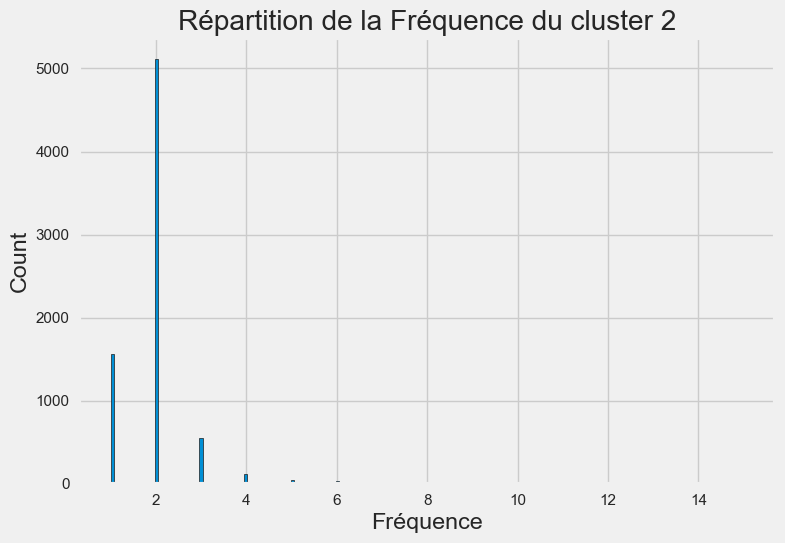

In [501]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["Frequency"].mean())
print("med:\n", df_tmp_c2["Frequency"].median())
print("mod:\n", df_tmp_c2["Frequency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["Frequency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["Frequency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["Frequency"].std() / df_tmp_c2["Frequency"].mean(),
)

print(df_tmp_c2["Frequency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["Frequency"], edgecolor="k", bins=200)
plt.title("Répartition de la Fréquence du cluster 2")
plt.xlabel("Fréquence")
plt.ylabel("Count");

moy:
 544.7338422323584
med:
 296.76
mod:
 0    879.27
Name: Monetary, dtype: float64
Ecart type:
 616.1040655815607
Var:
 379584.2196261281
Coefficient de variation CV : 1.1310943970221141
count     7454.000000
mean       544.733842
std        616.145397
min         35.940000
25%        171.235000
50%        296.760000
75%        806.470000
max      13664.080000
Name: Monetary, dtype: float64


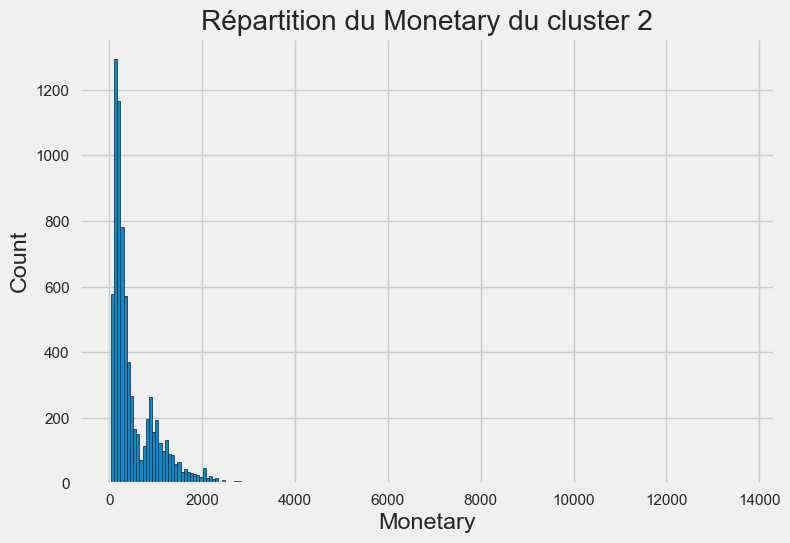

In [502]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["Monetary"].mean())
print("med:\n", df_tmp_c2["Monetary"].median())
print("mod:\n", df_tmp_c2["Monetary"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["Monetary"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["Monetary"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["Monetary"].std() / df_tmp_c2["Monetary"].mean(),
)

print(df_tmp_c2["Monetary"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["Monetary"], edgecolor="k", bins=200)
plt.title("Répartition du Monetary du cluster 2")
plt.xlabel("Monetary")
plt.ylabel("Count");

##### <a name="C82113">8.2.1.1.3 Intégration du clustering dans le modèle </a>

In [503]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           96667 non-null  float64
 1   Frequency         96667 non-null  float64
 2   Monetary          96667 non-null  float64
 3   cluster_rfm_kmpp  96667 non-null  object 
dtypes: float64(3), object(1)
memory usage: 5.7+ MB


In [504]:
# Standardisation
std_scaled = preprocessing.StandardScaler()
df_rfm_scaled, std_scaled = standardisation(df_rfm, std_scaled)

Nous avons X de forme (96667, 4)


In [505]:
# Appel de fonction d'encodage
print("Encodage :")
df_rfm_scaled_encoded = encodage_objet(df_rfm_scaled)
print("Après encodage nous avons : df_rfm_scaled_encoded=", df_rfm_scaled_encoded.shape)
print("--------------------------")

Encodage :
0 colonnes ont étés "label encodée.
Après label encoding et one hot encoding, nous avons maintenant X ayant cette forme : (96667, 6)
Après encodage nous avons : df_rfm_scaled_encoded= (96667, 6)
--------------------------


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\2962083164.py:20: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [506]:
df_rfm_scaled_encoded.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp_0,cluster_rfm_kmpp_1,cluster_rfm_kmpp_2
customer_id,,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,1.527105,-0.200422,-0.102673,1,0,0
18955e83d337fd6b2def6b18a428ac77,-0.054120,-0.200422,0.703718,0,1,0
4e7b3e00288586ebd08712fdd0374a03,-0.887380,-0.200422,-0.056241,0,1,0
b2b6027bc5c5109e529d4dc6358b12c3,-0.447786,-0.200422,0.010327,0,1,0
4f2d8ab171c80ec8364f7c12e35b23ad,-1.346657,-0.200422,0.347873,0,1,0


In [507]:
# cluster_kmeanspp(df, nb_clusters)
kmspp = cluster_kmeanspp(df_rfm_scaled_encoded, 3)

# intégration des clusters dans la df d'origine avant transformation
df_rfm["cluster_rfm_kmpp_2"] = kmspp.labels_
df_rfm.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp,cluster_rfm_kmpp_2
customer_id,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,0,0
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1,2
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1,2
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1,2
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1,2


In [508]:
df_rfm["cluster_rfm_kmpp_2"] = df_rfm["cluster_rfm_kmpp_2"].astype("object")
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfm_kmpp    96667 non-null  object 
 4   cluster_rfm_kmpp_2  96667 non-null  object 
dtypes: float64(3), object(2)
memory usage: 6.4+ MB


In [509]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfm, "Recency", "Frequency", "Monetary", "cluster_rfm_kmpp_2")

In [510]:
# Proportion de clusters
df_tmp = df_rfm["cluster_rfm_kmpp_2"].value_counts()
df_tmp = pd.DataFrame(df_tmp).reset_index()
df_tmp.set_axis(["cluster_rfm_kmpp_2", "qte"], axis="columns", inplace=True)
df_tmp.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\2396358743.py:4: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,cluster_rfm_kmpp_2,qte
0,2,51303
1,0,37910
2,1,7454


Text(0.5, 1.0, 'Répartition des clusters kmeans++ 2 de RFM')

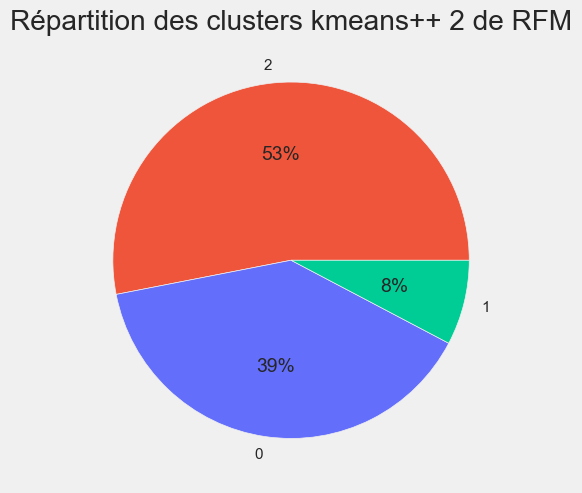

In [511]:
# colors = sns.color_palette('pastel')[0:5]
# 0 : #636EFA - bleu
# 1 : #EF553B - rouge
# 2 : #00CC96 - vert
# 3 : #AB63FA - violet

colors = ["#EF553B", "#636EFA", "#00CC96", "#AB63FA"]
plt.pie(
    df_tmp["qte"], labels=df_tmp["cluster_rfm_kmpp_2"], colors=colors, autopct="%.0f%%"
)
plt.title("Répartition des clusters kmeans++ 2 de RFM")

In [512]:
# Suppression du cluster 2 qui a juste servi de test
# df_rfm.drop(columns=["cluster_rfm_kmpp_2"],axis=1,inplace=True)
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfm_kmpp    96667 non-null  object 
 4   cluster_rfm_kmpp_2  96667 non-null  object 
dtypes: float64(3), object(2)
memory usage: 6.4+ MB


In [513]:
# Test de corrélation entre mes segments RFM et les clusters crées
# plt.figure(figsize=(10, 5))
# plt.title("'Comparaison classification RFM (ordonnées) et Kmeans++ (abscisse)'")
# sns.set(style="whitegrid")
# plt.xticks([0,1,2,3])
# sns.boxplot(x='cluster', y='Customer_segment', data=df_model)

#### <a name="C8212">8.2.1.2 Classification hierarchique </a>

##### <a name="C82121">8.2.1.2.1 Filtrage des données </a>

In [514]:
# Le dataframe étant trop volumineux, je dois prendre qu'un échantillon du df

df_rfm_split_allcol = df_rfm.sample(frac=0.3, random_state=200)
df_rfm_split_allcol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29000 entries, 1268526bf0726490d03a27535d35b390 to b60e676e8b6d16e7e63ba66c383072d2
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             29000 non-null  float64
 1   Frequency           29000 non-null  float64
 2   Monetary            29000 non-null  float64
 3   cluster_rfm_kmpp    29000 non-null  object 
 4   cluster_rfm_kmpp_2  29000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


In [515]:
# Selection des features
df_rfm_split = df_rfm_split_allcol[["Recency", "Frequency", "Monetary"]].copy()
df_rfm_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29000 entries, 1268526bf0726490d03a27535d35b390 to b60e676e8b6d16e7e63ba66c383072d2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    29000 non-null  float64
 1   Frequency  29000 non-null  float64
 2   Monetary   29000 non-null  float64
dtypes: float64(3)
memory usage: 906.2+ KB


In [516]:
# Standardisation (pas d'encodage car que des floats sont présents dans dataframe
std_scaled = preprocessing.StandardScaler()
df_rfm_split_scaled, std_scaled = standardisation(df_rfm_split, std_scaled)

Nous avons X de forme (29000, 3)


In [517]:
df_rfm_split_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29000 entries, 1268526bf0726490d03a27535d35b390 to b60e676e8b6d16e7e63ba66c383072d2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    29000 non-null  float64
 1   Frequency  29000 non-null  float64
 2   Monetary   29000 non-null  float64
dtypes: float64(3)
memory usage: 1.9+ MB


##### <a name="C82122">8.2.1.2.2 Choix du nombre de clusters </a>

In [518]:
Z = linkage(df_rfm_split_scaled, method="ward")

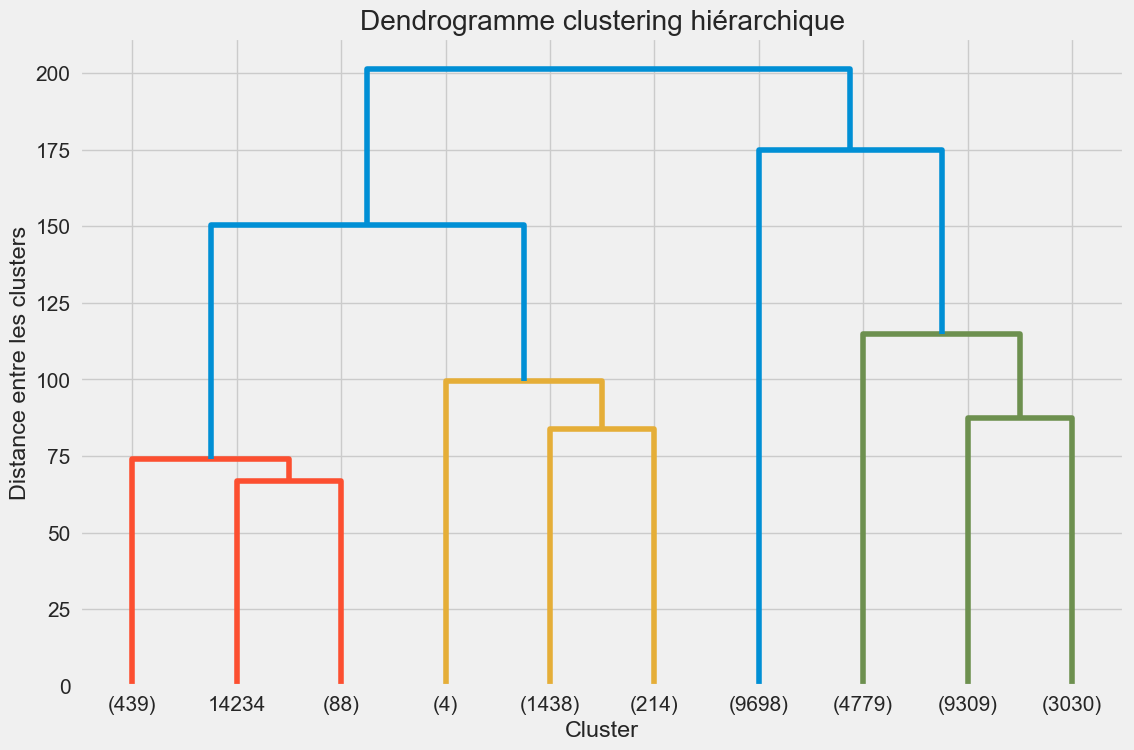

In [519]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=10, ax=ax, truncate_mode="lastp", orientation="top")

plt.title("Dendrogramme clustering hiérarchique")
ax.set_xlabel("Cluster")
ax.set_ylabel("Distance entre les clusters")
ax.tick_params(axis="x", which="major", labelsize=15)
ax.tick_params(axis="y", which="major", labelsize=15)

##### <a name="C82123">8.2.1.2.3 Création du clustering </a>

In [520]:
# Creating the model
agg_clustering = AgglomerativeClustering(
    n_clusters=3, metric="euclidean", linkage="ward"
)

# predicting the labels
labels = agg_clustering.fit_predict(df_rfm_split_scaled)


df_rfm_split["cluster_rfm_ch"] = labels

In [521]:
df_rfm_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29000 entries, 1268526bf0726490d03a27535d35b390 to b60e676e8b6d16e7e63ba66c383072d2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         29000 non-null  float64
 1   Frequency       29000 non-null  float64
 2   Monetary        29000 non-null  float64
 3   cluster_rfm_ch  29000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.1+ MB


In [522]:
# changement de type pour cluster : passage en objet
df_rfm_split["cluster_rfm_ch"] = df_rfm_split["cluster_rfm_ch"].astype("object")
df_rfm_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29000 entries, 1268526bf0726490d03a27535d35b390 to b60e676e8b6d16e7e63ba66c383072d2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         29000 non-null  float64
 1   Frequency       29000 non-null  float64
 2   Monetary        29000 non-null  float64
 3   cluster_rfm_ch  29000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


In [523]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfm_split, "Recency", "Frequency", "Monetary", "cluster_rfm_ch")

In [524]:
# Proportion de clusters
df_tmp = df_rfm_split["cluster_rfm_ch"].value_counts()
df_tmp = pd.DataFrame(df_tmp).reset_index()
df_tmp.set_axis(["cluster_rfm_ch", "qte"], axis="columns", inplace=True)
df_tmp.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\3766032375.py:4: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,cluster_rfm_ch,qte
0,1,17118
1,2,9698
2,0,2184


Text(0.5, 1.0, 'Répartition des clusters classification hierarchique de RFM')

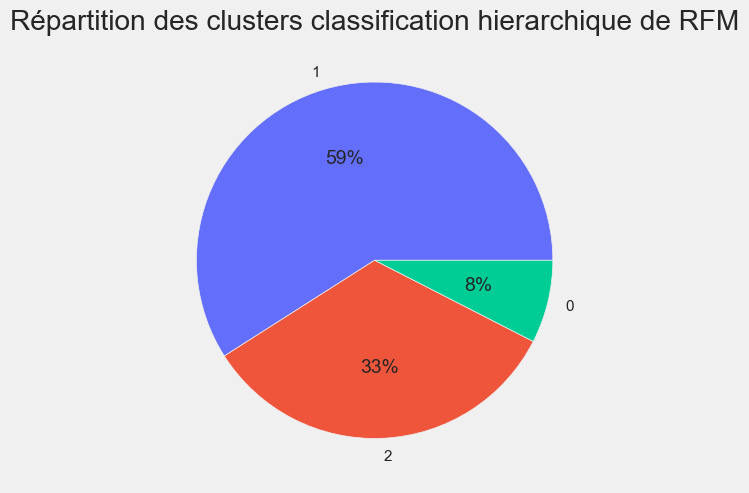

In [525]:
# colors = sns.color_palette('pastel')[0:5]
# 2 : #636EFA - bleu
# 3 : #EF553B - rouge
# 0 : #00CC96 - vert
# 1 : #AB63FA - violet
colors = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

plt.pie(df_tmp["qte"], labels=df_tmp["cluster_rfm_ch"], colors=colors, autopct="%.0f%%")
plt.title("Répartition des clusters classification hierarchique de RFM")

##### <a name="C82124">8.2.1.2.4 intégration clustering df_finale </a>

In [526]:
df_rfm.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp,cluster_rfm_kmpp_2
customer_id,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,0,0
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1,2
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1,2
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1,2
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1,2


In [527]:
df_rfm_split.head()

,Recency,Frequency,Monetary,cluster_rfm_ch
customer_id,,,,
1268526bf0726490d03a27535d35b390,47.0,1.0,158.74,2
022bdd440f8a37e8ba62d67287135a75,154.0,1.0,142.92,2
83fbf2cad0c9510da566e5681efe63b2,118.0,1.0,113.35,2
a59b412d844d8ee85fe937ea21ec7c16,30.0,1.0,72.98,2
7700eadddc5206fa9e00bd2868f08d14,573.0,1.0,167.10,1


In [528]:
df_rfm = pd.merge(
    df_rfm,
    df_rfm_split["cluster_rfm_ch"],
    left_on="customer_id",
    right_on="customer_id",
    how="left",
)
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfm_kmpp    96667 non-null  object 
 4   cluster_rfm_kmpp_2  96667 non-null  object 
 5   cluster_rfm_ch      29000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.2+ MB


#### <a name="C8213">8.2.1.3 DBSCAN </a>

In [529]:
# Selection des colonnes
df_rfm_dbs = df_rfm[["Recency", "Frequency", "Monetary"]].copy()
df_rfm_dbs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    96667 non-null  float64
 1   Frequency  96667 non-null  float64
 2   Monetary   96667 non-null  float64
dtypes: float64(3)
memory usage: 3.0+ MB


In [530]:
# Standardisation (pas d'encodage car que des floats sont présents dans dataframe
std_scaled = preprocessing.StandardScaler()
df_rfm_scaled, std_scaled = standardisation(df_rfm_dbs, std_scaled)

Nous avons X de forme (96667, 3)


In [531]:
df_db = DBSCAN(eps=0.5, min_samples=2).fit(df_rfm_scaled)
labels = df_db.labels_

In [532]:
df_rfm["cluster_rfm_dbs"] = df_db.labels_

In [533]:
# changement de type pour cluster : passage en objet
df_rfm["cluster_rfm_dbs"] = df_rfm["cluster_rfm_dbs"].astype("object")

In [534]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfm_kmpp    96667 non-null  object 
 4   cluster_rfm_kmpp_2  96667 non-null  object 
 5   cluster_rfm_ch      29000 non-null  object 
 6   cluster_rfm_dbs     96667 non-null  object 
dtypes: float64(3), object(4)
memory usage: 7.9+ MB


In [535]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfm, "Recency", "Frequency", "Monetary", "cluster_rfm_dbs")

In [536]:
# Proportion de clusters
df_tmp = df_rfm["cluster_rfm_dbs"].value_counts()
df_tmp = pd.DataFrame(df_tmp).reset_index()
df_tmp.set_axis(["cluster_rfm_dbs", "qte"], axis="columns", inplace=True)
df_tmp.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\124937785.py:4: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,cluster_rfm_dbs,qte
0,0,90398
1,1,5127
2,3,491
3,4,252
4,7,28


Text(0.5, 1.0, 'Répartition des clusters DBSCAN de RFM')

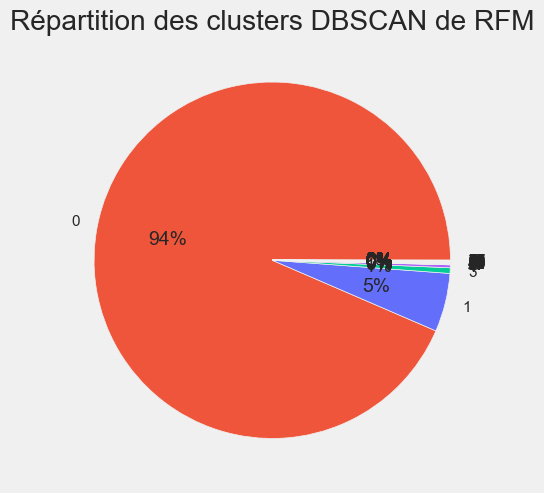

In [537]:
# colors = sns.color_palette('pastel')[0:5]
# 0 : #636EFA - bleu
# 1 : #EF553B - rouge
# 2 : #00CC96 - vert
# 1 : #AB63FA - violet
colors = ["#EF553B", "#636EFA", "#00CC96", "#AB63FA"]
plt.pie(
    df_tmp["qte"], labels=df_tmp["cluster_rfm_dbs"], colors=colors, autopct="%.0f%%"
)
plt.title("Répartition des clusters DBSCAN de RFM")

#### <a name="C8214">8.2.1.4 Corrélation clusters des 3 modèles - ARI score </a>

In [538]:
df_rfm.head()

,Recency,Frequency,Monetary,cluster_rfm_kmpp,cluster_rfm_kmpp_2,cluster_rfm_ch,cluster_rfm_dbs
customer_id,,,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,0,0,NaN,0
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1,2,NaN,0
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1,2,NaN,0
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1,2,NaN,0
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1,2,NaN,0


In [539]:
# ARI score entre kmeans++ et kmeans++2
metrics.adjusted_rand_score(df_rfm["cluster_rfm_kmpp"], df_rfm["cluster_rfm_kmpp_2"])

1.0

In [540]:
# ARI score entre kmeans++ et dbscan
metrics.adjusted_rand_score(df_rfm["cluster_rfm_kmpp"], df_rfm["cluster_rfm_dbs"])

0.1791323042126936

In [541]:
# ARI score entre kmeans++ et clustering hierarchique
# Suppression des Nan du à l'échantillonnage sur CH (prise en charge de trop de mémoire du df conplète)
df_tmp = df_rfm.loc[df_rfm["cluster_rfm_ch"].notnull()]
metrics.adjusted_rand_score(df_tmp["cluster_rfm_kmpp"], df_tmp["cluster_rfm_ch"])

0.42001607335995456

In [542]:
# ARI score entre dbscan et clustering hierarchique
metrics.adjusted_rand_score(df_tmp["cluster_rfm_dbs"], df_tmp["cluster_rfm_ch"])

0.19127407732260324

### <a name="C822">8.2.2 RFM + evaluation client </a>

In [543]:
# Selection des features
df_rfme = df_model[["Recency", "Frequency", "Monetary", "review_score"]].copy()

# Suppression des lignes contenant au moins 1 NaN
df_rfme.dropna(axis=0, inplace=True)

df_rfme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       95815 non-null  float64
 1   Frequency     95815 non-null  float64
 2   Monetary      95815 non-null  float64
 3   review_score  95815 non-null  float64
dtypes: float64(4)
memory usage: 3.7+ MB


In [544]:
# Standardisation (pas d'encodage car que des floats sont présents dans dataframe
std_scaled = preprocessing.StandardScaler()
df_rfme_scaled, std_scaled = standardisation(df_rfme, std_scaled)

Nous avons X de forme (95815, 4)


#### <a name="C8221">8.2.2.1 K-means++</a>

##### <a name="C82211">8.2.2.1.1 Choix du nombre de clusters</a>

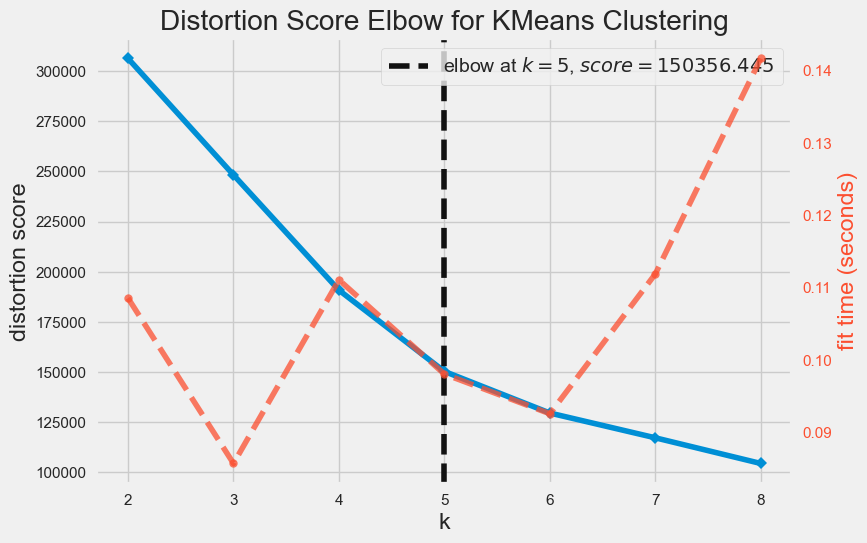

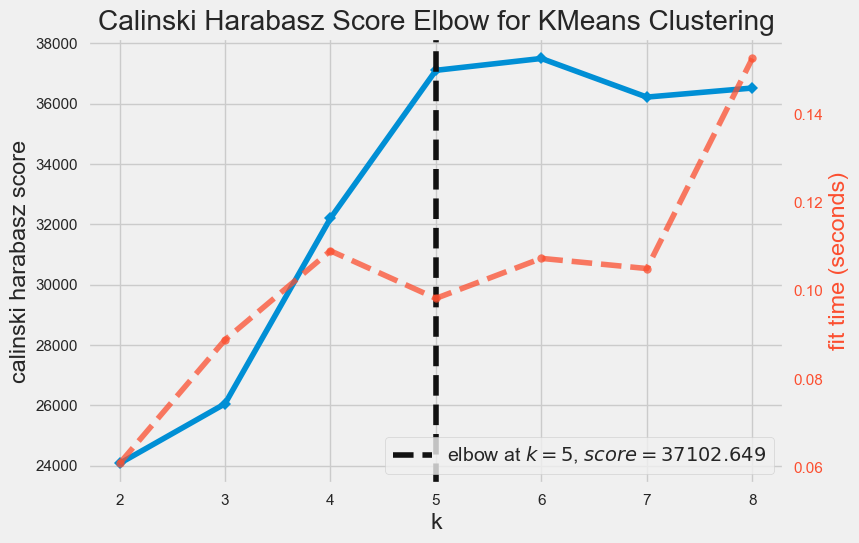

In [545]:
# Estimation du meilleur clusturing par 3 métriques

visualisation_coude(df_rfme_scaled, "distortion")
visualisation_coude(df_rfme_scaled, "calinski_harabasz")
# visualisation_coude(df_rfme_scaled,'silhouette')

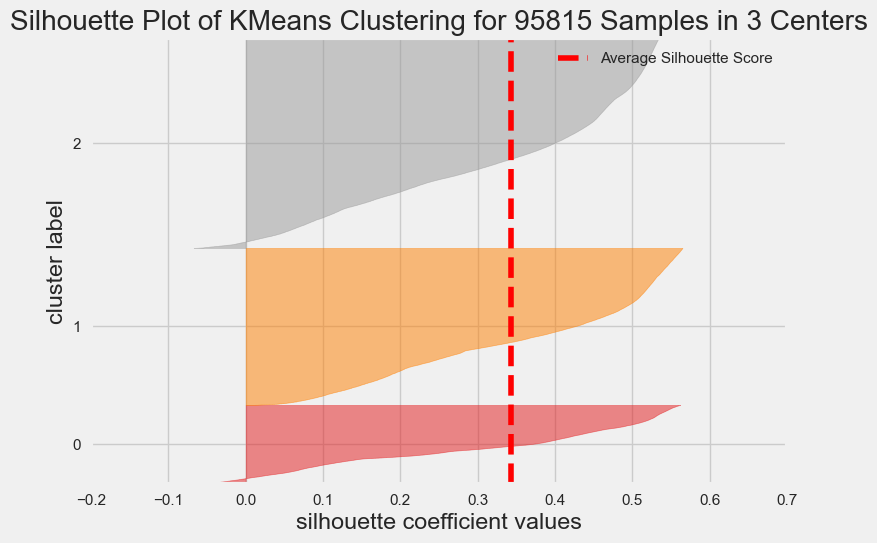

In [546]:
# Visualisation des silouhettes des clusters
# visualisation_silhouette(df_rfme_scaled,2)
visualisation_silhouette(df_rfme_scaled, 3)
# visualisation_silhouette(df_rfme_scaled,4)
# visualisation_silhouette(df_rfme_scaled,5)

##### <a name="C82212">8.2.2.1.2 Création du clustering </a>

In [547]:
# cluster_kmeanspp(df, nb_clusters)
kmspp = cluster_kmeanspp(df_rfme_scaled, 3)

# intégration des clusters dans la df d'origine avant transformation
df_rfme["cluster_rfme_kmpp"] = kmspp.labels_
df_rfme.head()

,Recency,Frequency,Monetary,review_score,cluster_rfme_kmpp
customer_id,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,4.0,1
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,5.0,2
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,5.0,2
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,5.0,2
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,5.0,2


In [548]:
df_rfme["cluster_rfme_kmpp"] = df_rfme["cluster_rfme_kmpp"].astype("object")
df_rfme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recency            95815 non-null  float64
 1   Frequency          95815 non-null  float64
 2   Monetary           95815 non-null  float64
 3   review_score       95815 non-null  float64
 4   cluster_rfme_kmpp  95815 non-null  object 
dtypes: float64(4), object(1)
memory usage: 6.4+ MB


In [549]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfme, "Recency", "Frequency", "Monetary", "cluster_rfme_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfme, "review_score", "Frequency", "Monetary", "cluster_rfme_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfme, "Recency", "review_score", "Monetary", "cluster_rfme_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfme, "Recency", "Frequency", "review_score", "cluster_rfme_kmpp")

In [550]:
# Proportion de clusters
df_tmp = df_rfme["cluster_rfme_kmpp"].value_counts()
df_tmp = pd.DataFrame(df_tmp).reset_index()
df_tmp.set_axis(["cluster_rfme_kmpp", "qte"], axis="columns", inplace=True)
df_tmp.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\3709010860.py:4: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,cluster_rfme_kmpp,qte
0,2,45109
1,1,33775
2,0,16931


Text(0.5, 1.0, 'Répartition des clusters kmeans++ de RFME')

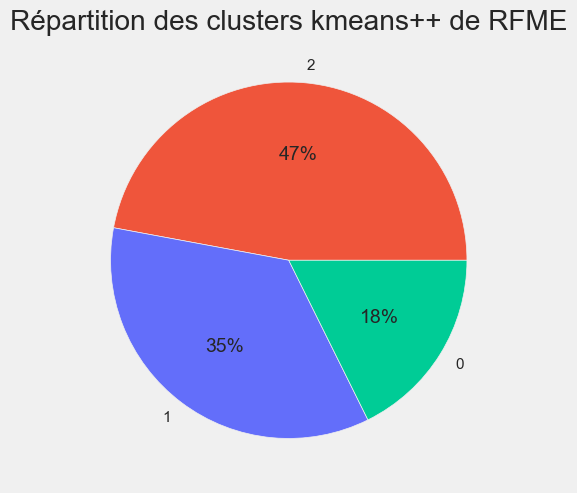

In [551]:
# colors = sns.color_palette('pastel')[0:5]
# #636EFA : bleu
# #EF553B : rouge
# #00CC96 : vert

colors = ["#EF553B", "#636EFA", "#00CC96"]
plt.pie(
    df_tmp["qte"], labels=df_tmp["cluster_rfme_kmpp"], colors=colors, autopct="%.0f%%"
)
plt.title("Répartition des clusters kmeans++ de RFME")

In [552]:
df_tmp = df_rfme[
    ["Recency", "Frequency", "Monetary", "review_score", "cluster_rfme_kmpp"]
]
df_tmp.head()

,Recency,Frequency,Monetary,review_score,cluster_rfme_kmpp
customer_id,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,4.0,1
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,5.0,2
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,5.0,2
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,5.0,2
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,5.0,2


<AxesSubplot: title={'center': 'Récence par cluster rfme'}, xlabel='cluster_rfme_kmpp', ylabel='Recency'>

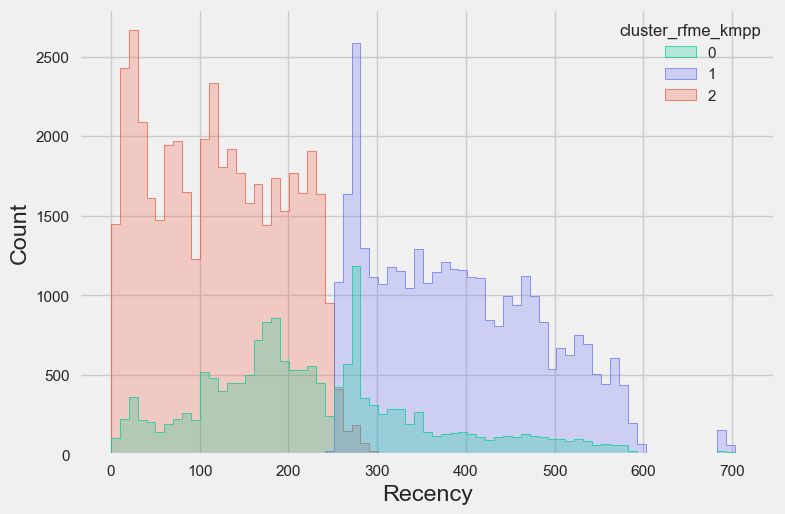

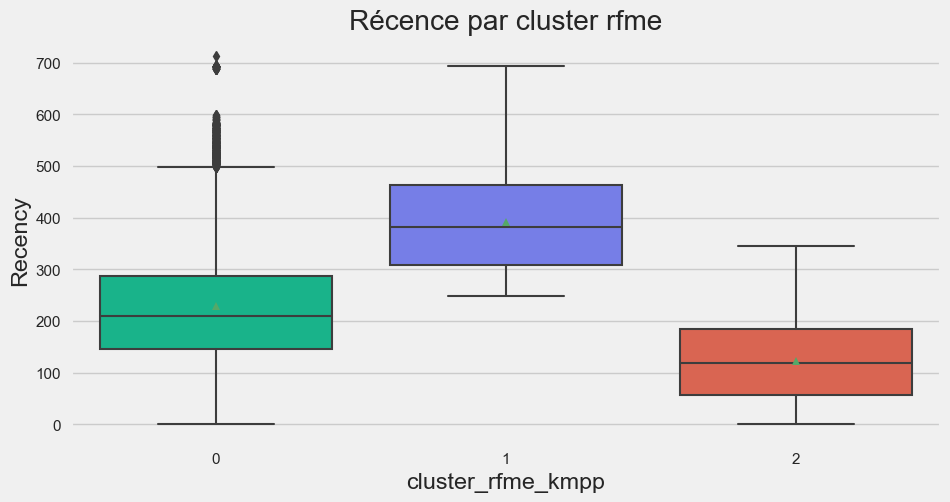

In [553]:
sns.histplot(
    data=df_tmp,
    x="Recency",
    hue="cluster_rfme_kmpp",
    element="step",
    kde=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

plt.figure(figsize=(10, 5))
plt.title("Récence par cluster rfme")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfme_kmpp",
    y="Recency",
    data=df_tmp,
    showmeans=True,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

<AxesSubplot: title={'center': 'Fréquence par cluster rfme'}, xlabel='cluster_rfme_kmpp', ylabel='Frequency'>

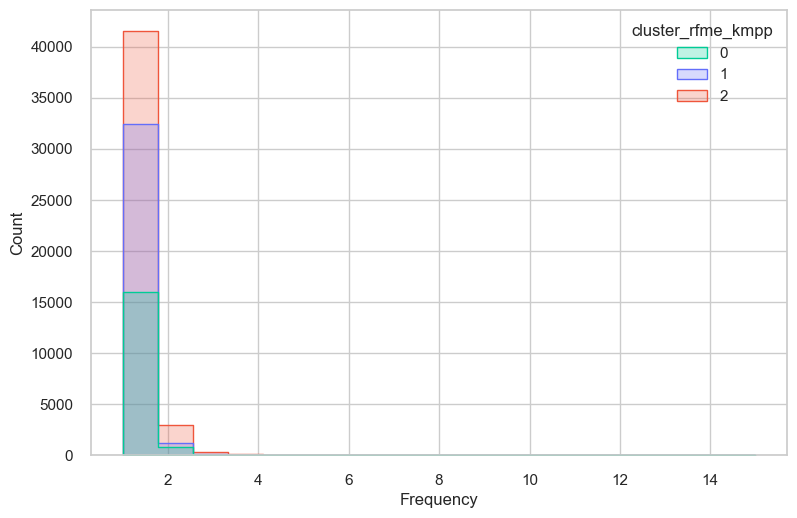

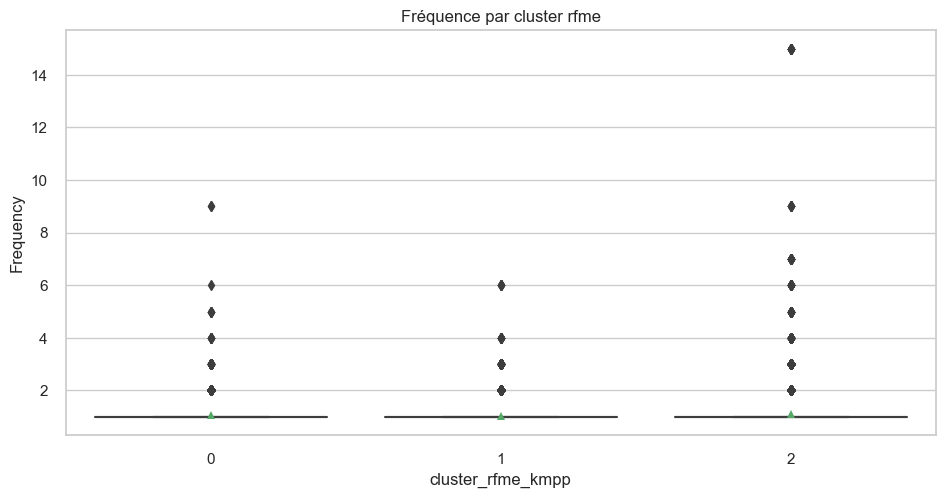

In [554]:
sns.histplot(
    data=df_tmp,
    x="Frequency",
    hue="cluster_rfme_kmpp",
    element="step",
    kde=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence par cluster rfme")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfme_kmpp",
    y="Frequency",
    data=df_tmp,
    showmeans=True,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

<AxesSubplot: title={'center': 'Fréquence (=1) par cluster'}, xlabel='cluster_rfme_kmpp', ylabel='Frequency'>

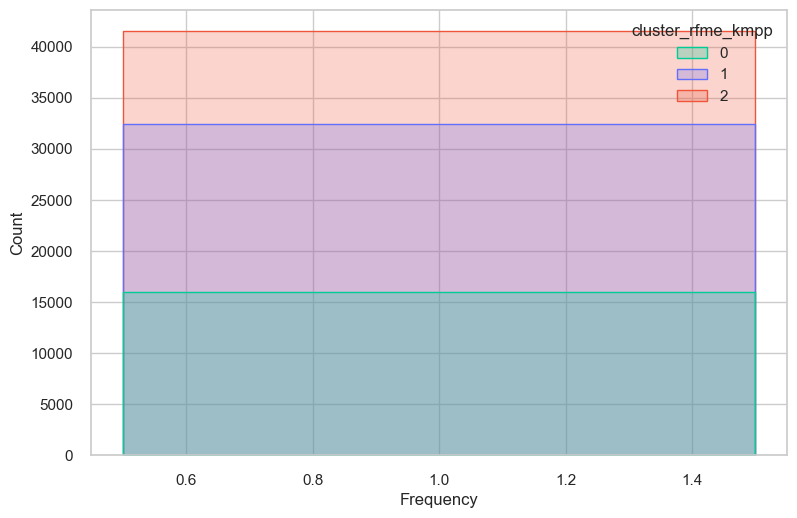

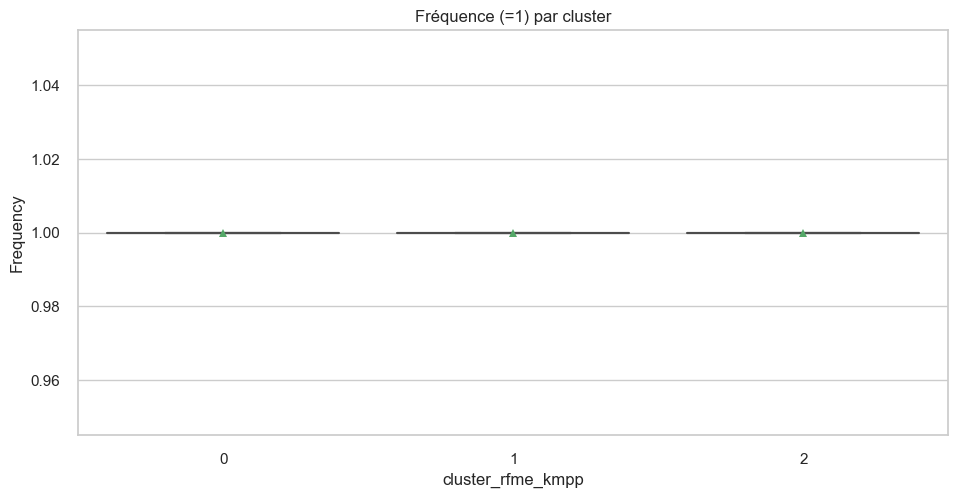

In [555]:
df_tmp2 = df_tmp.loc[df_tmp["Frequency"] == 1]
sns.histplot(
    data=df_tmp2,
    x="Frequency",
    hue="cluster_rfme_kmpp",
    element="step",
    kde=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence (=1) par cluster")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfme_kmpp", y="Frequency", data=df_tmp2, showmeans=True)

<AxesSubplot: title={'center': 'Monetary par cluster rfme'}, xlabel='cluster_rfme_kmpp', ylabel='Monetary'>

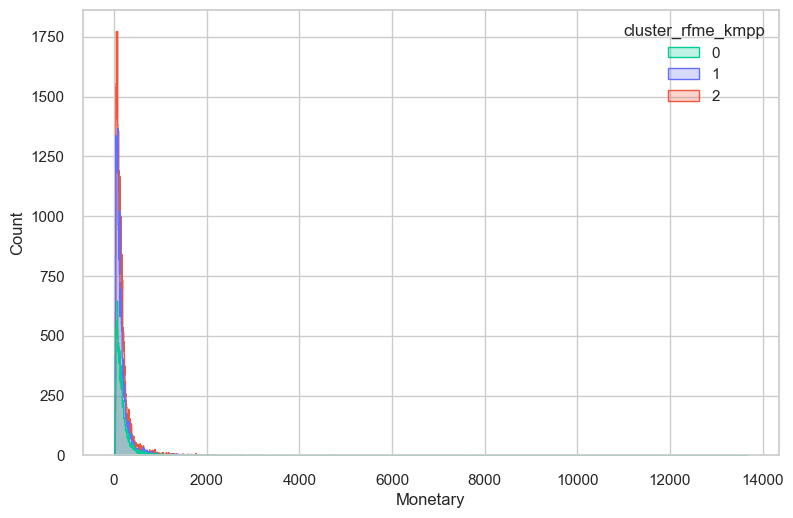

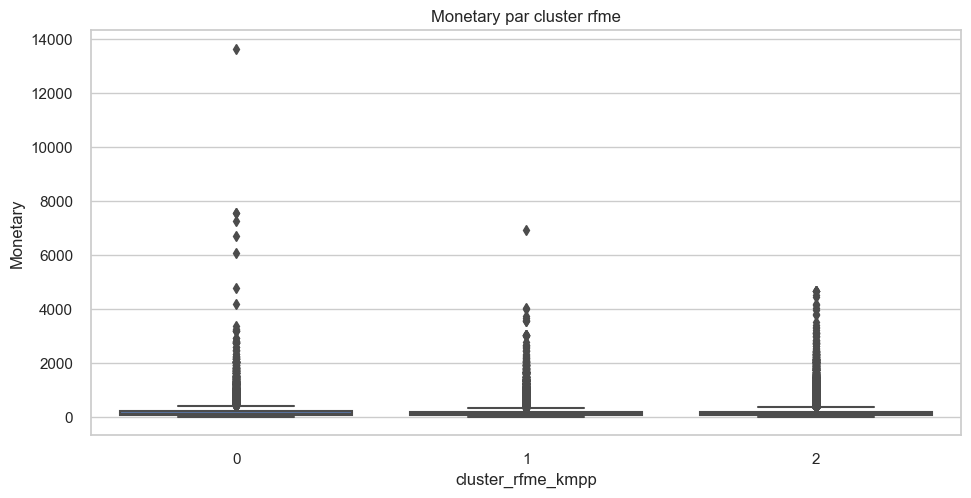

In [556]:
sns.histplot(
    data=df_tmp,
    x="Monetary",
    hue="cluster_rfme_kmpp",
    element="step",
    kde=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

plt.figure(figsize=(10, 5))
plt.title("Monetary par cluster rfme")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfme_kmpp", y="Monetary", data=df_tmp, showmeans=False)

<AxesSubplot: title={'center': 'Monetary (<600) par cluster rfme'}, xlabel='cluster_rfme_kmpp', ylabel='Monetary'>

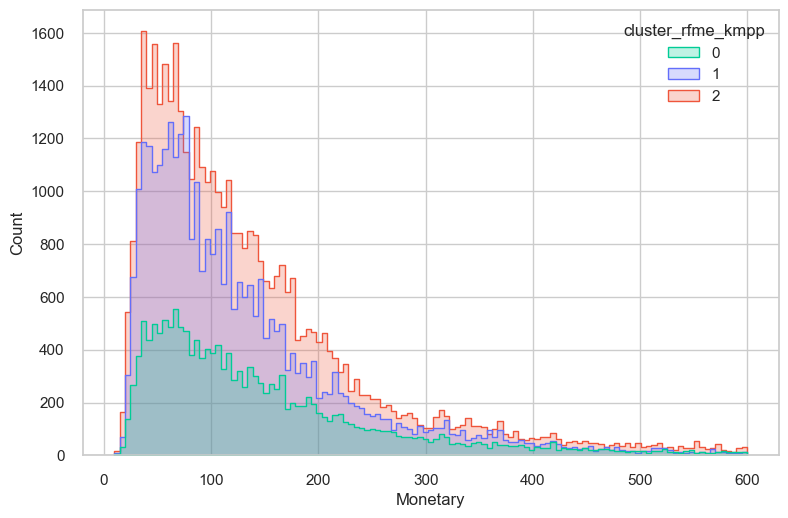

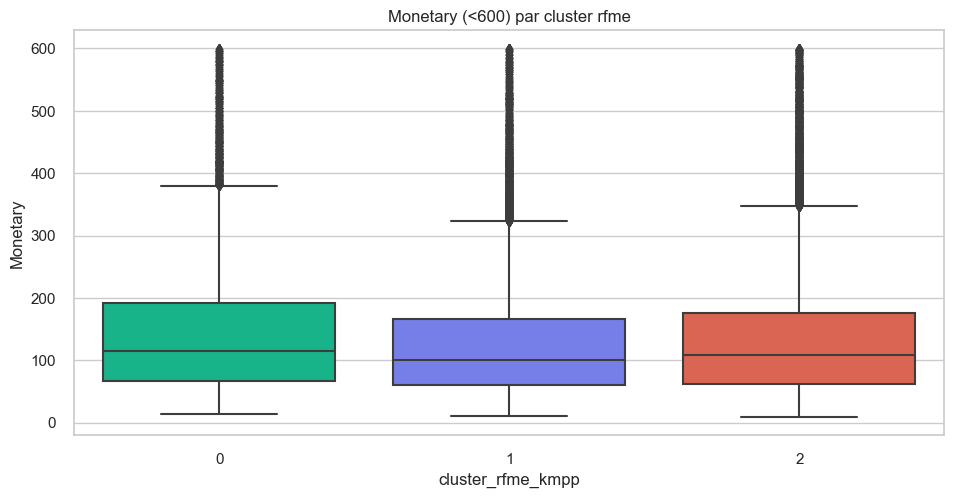

In [557]:
df_tmp2 = df_tmp.loc[df_tmp["Monetary"] < 600]
sns.histplot(
    data=df_tmp2,
    x="Monetary",
    hue="cluster_rfme_kmpp",
    element="step",
    kde=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

plt.figure(figsize=(10, 5))
plt.title("Monetary (<600) par cluster rfme")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfme_kmpp",
    y="Monetary",
    data=df_tmp2,
    showmeans=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

<AxesSubplot: title={'center': 'Review-score par cluster rfme'}, xlabel='cluster_rfme_kmpp', ylabel='review_score'>

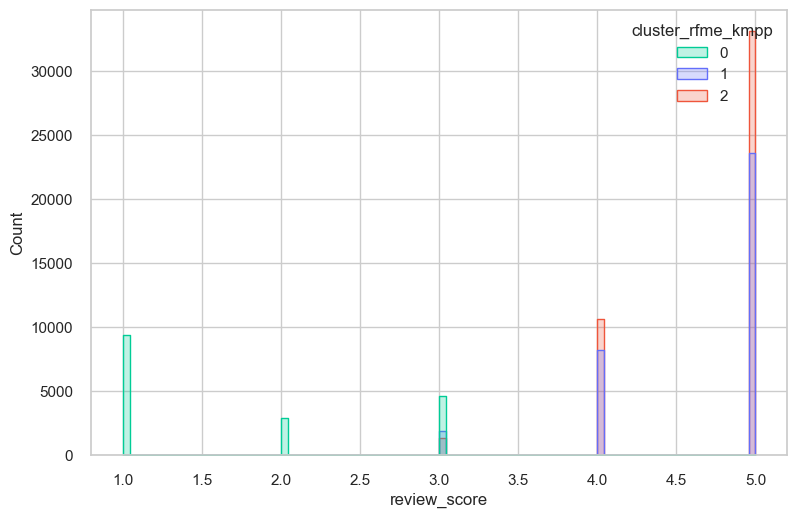

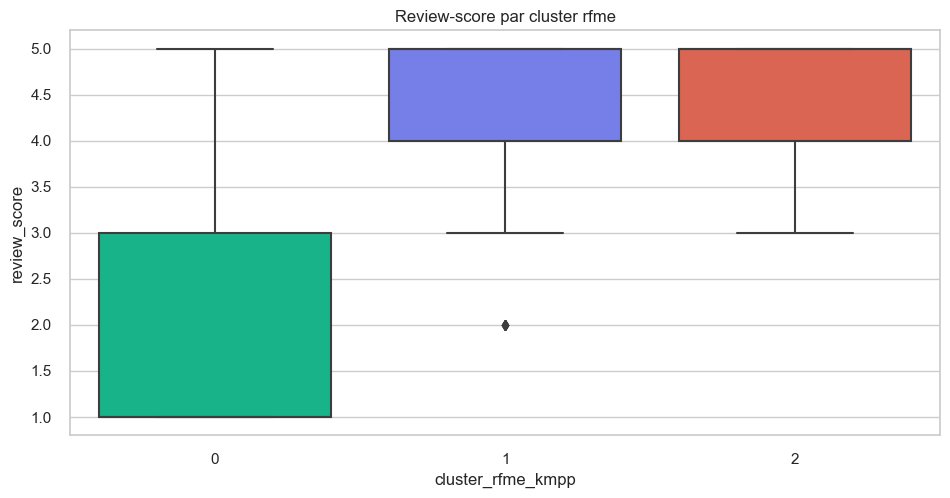

In [558]:
sns.histplot(
    data=df_tmp,
    x="review_score",
    hue="cluster_rfme_kmpp",
    element="step",
    kde=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

plt.figure(figsize=(10, 5))
plt.title("Review-score par cluster rfme")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfme_kmpp",
    y="review_score",
    data=df_tmp,
    showmeans=False,
    palette=["#00CC96", "#636EFA", "#EF553B"],
)

###### <a name="C822121">8.2.2.1.2.1 Clustering 0 </a>

In [559]:
df_tmp_c0 = df_tmp.loc[df_tmp["cluster_rfme_kmpp"] == 0]
df_tmp_c0.head()

,Recency,Frequency,Monetary,review_score,cluster_rfme_kmpp
customer_id,,,,,
5e274e7a0c3809e14aba7ad5aae0d407,285.0,1.0,36.01,3.0,0
690172ab319622688d3b4df42f676898,318.0,1.0,232.71,1.0,0
e0eea8f69a457b3f1fa246e44c9ebefd,278.0,1.0,69.12,2.0,0
4c06b42fbf7b97ab10779cda5549cd1c,52.0,1.0,315.75,1.0,0
19cecb194f54e614b70d971306a9931b,133.0,1.0,50.92,2.0,0


moy:
 229.3943063020495
med:
 210.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 126.14993512254884
Var:
 15913.80613142328
Coefficient de variation CV : 0.5499424233070408
count    16931.000000
mean       229.394306
std        126.153661
min          0.000000
25%        146.000000
50%        210.000000
75%        287.000000
max        713.000000
Name: Recency, dtype: float64


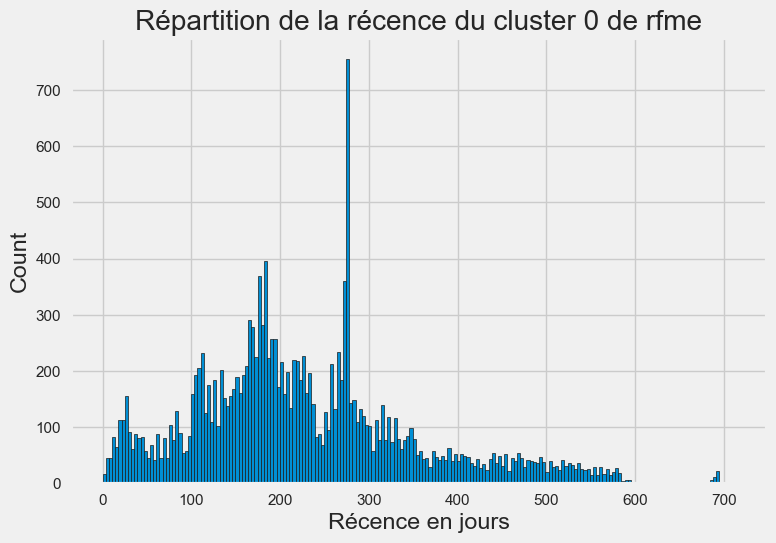

In [560]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["Recency"].mean())
print("med:\n", df_tmp_c0["Recency"].median())
print("mod:\n", df_tmp_c0["Recency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["Recency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["Recency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["Recency"].std() / df_tmp_c0["Recency"].mean(),
)

print(df_tmp_c0["Recency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["Recency"], edgecolor="k", bins=200)
plt.title("Répartition de la récence du cluster 0 de rfme")
plt.xlabel("Récence en jours")
plt.ylabel("Count");

moy:
 1.0612485972476522
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.28085246220322657
Var:
 0.0788781055256148
Coefficient de variation CV : 0.26465123942646707
count    16931.000000
mean         1.061249
std          0.280861
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: Frequency, dtype: float64


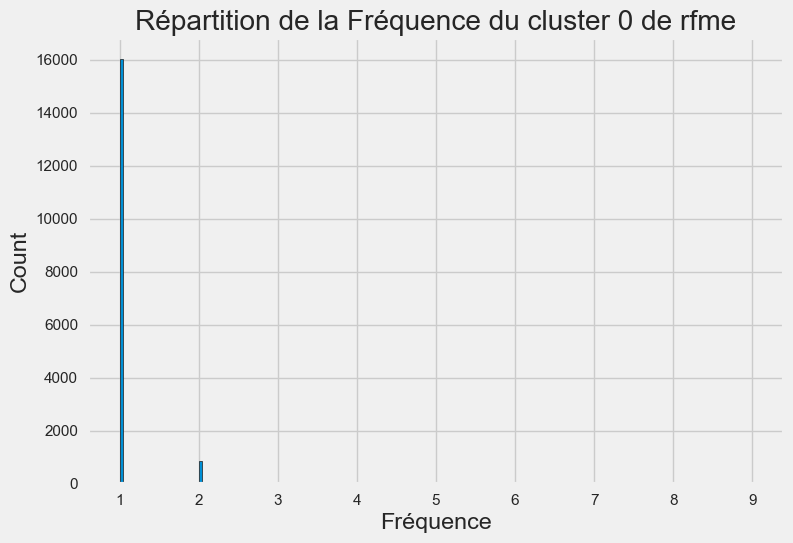

In [561]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["Frequency"].mean())
print("med:\n", df_tmp_c0["Frequency"].median())
print("mod:\n", df_tmp_c0["Frequency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["Frequency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["Frequency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["Frequency"].std() / df_tmp_c0["Frequency"].mean(),
)

print(df_tmp_c0["Frequency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["Frequency"], edgecolor="k", bins=200)
plt.title("Répartition de la Fréquence du cluster 0 de rfme")
plt.xlabel("Fréquence")
plt.ylabel("Count");

moy:
 192.78934853227807
med:
 120.52
mod:
 0    116.94
Name: Monetary, dtype: float64
Ecart type:
 293.08011723505103
Var:
 85895.95511851127
Coefficient de variation CV : 1.5202539714091379
count    16931.000000
mean       192.789349
std        293.088773
min         13.780000
25%         68.495000
50%        120.520000
75%        209.610000
max      13664.080000
Name: Monetary, dtype: float64


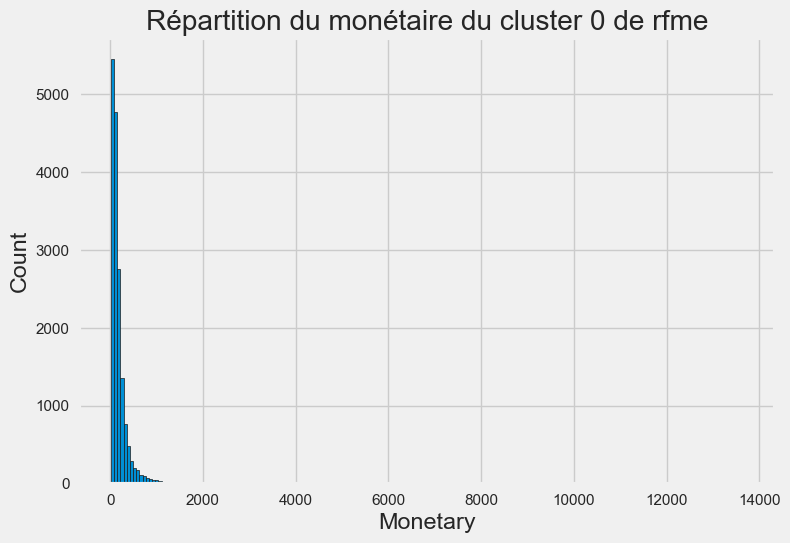

In [562]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["Monetary"].mean())
print("med:\n", df_tmp_c0["Monetary"].median())
print("mod:\n", df_tmp_c0["Monetary"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["Monetary"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["Monetary"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["Monetary"].std() / df_tmp_c0["Monetary"].mean(),
)

print(df_tmp_c0["Monetary"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["Monetary"], edgecolor="k", bins=200)
plt.title("Répartition du monétaire du cluster 0 de rfme")
plt.xlabel("Monetary")
plt.ylabel("Count");

moy:
 1.7232295788789793
med:
 1.0
mod:
 0    1.0
Name: review_score, dtype: float64
Ecart type:
 0.8676880267475651
Var:
 0.7528825117610832
Coefficient de variation CV : 0.5035392049662574
count    16931.000000
mean         1.723230
std          0.867714
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          5.000000
Name: review_score, dtype: float64


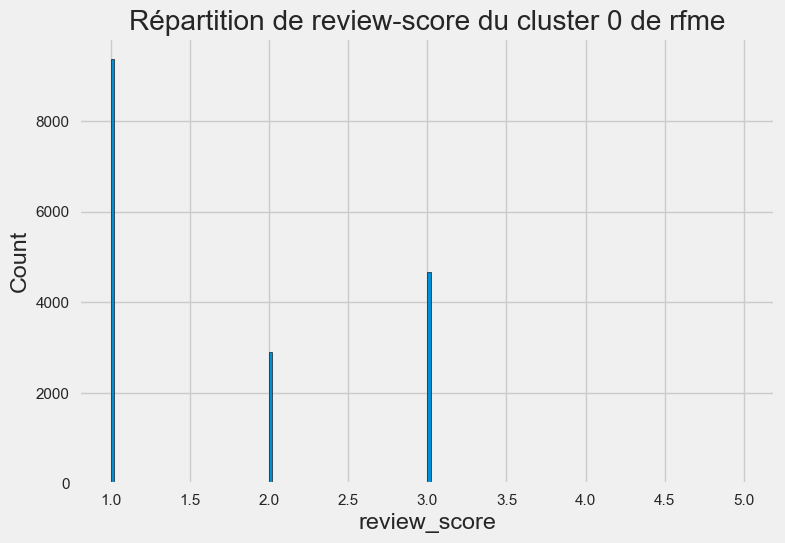

In [563]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c0["review_score"].mean())
print("med:\n", df_tmp_c0["review_score"].median())
print("mod:\n", df_tmp_c0["review_score"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c0["review_score"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c0["review_score"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c0["review_score"].std() / df_tmp_c0["review_score"].mean(),
)

print(df_tmp_c0["review_score"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c0["review_score"], edgecolor="k", bins=200)
plt.title("Répartition de review-score du cluster 0 de rfme")
plt.xlabel("review_score")
plt.ylabel("Count");

###### <a name="C822122">8.2.2.1.2.2 Clustering 1 </a>

In [564]:
df_tmp_c1 = df_tmp.loc[df_tmp["cluster_rfme_kmpp"] == 1]
df_tmp_c1.head()

,Recency,Frequency,Monetary,review_score,cluster_rfme_kmpp
customer_id,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,4.0,1
879864dab9bc3047522c92c82e1212b8,318.0,2.0,565.88,5.0,1
9fb35e4ed6f0a14a4977cd9aea4042bb,274.0,1.0,40.40,5.0,1
b2d1536598b73a9abd18e0d75d92f0a3,354.0,1.0,117.31,4.0,1
49d0ea0986edde72da777f15456a0ee0,300.0,1.0,54.62,4.0,1


moy:
 391.6515470022206
med:
 381.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 95.16084075047159
Var:
 9055.585612336616
Coefficient de variation CV : 0.24297682533584472
count    33775.000000
mean       391.651547
std         95.162250
min        249.000000
25%        308.000000
50%        381.000000
75%        464.000000
max        694.000000
Name: Recency, dtype: float64


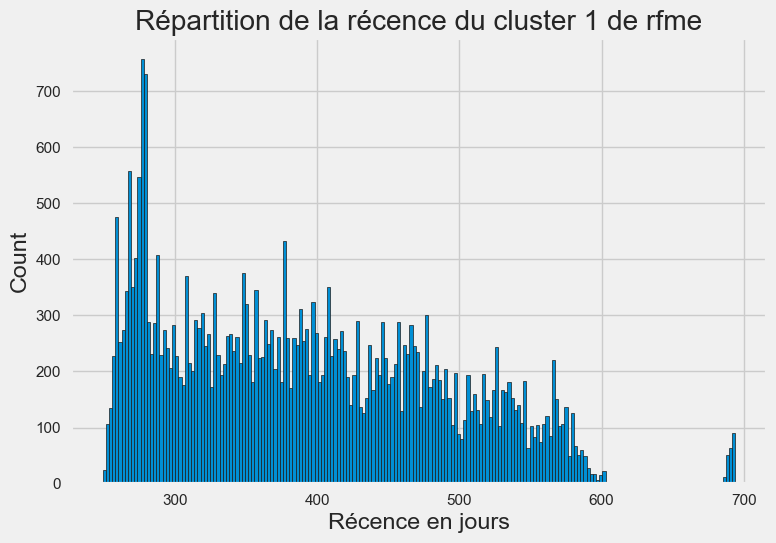

In [565]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["Recency"].mean())
print("med:\n", df_tmp_c1["Recency"].median())
print("mod:\n", df_tmp_c1["Recency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["Recency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["Recency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["Recency"].std() / df_tmp_c1["Recency"].mean(),
)

print(df_tmp_c1["Recency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["Recency"], edgecolor="k", bins=200)
plt.title("Répartition de la récence du cluster 1 de rfme")
plt.xlabel("Récence en jours")
plt.ylabel("Count");

moy:
 1.0443227239082162
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.23242988849576865
Var:
 0.05402365306615545
Coefficient de variation CV : 0.22256848779398786
count    33775.000000
mean         1.044323
std          0.232433
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Frequency, dtype: float64


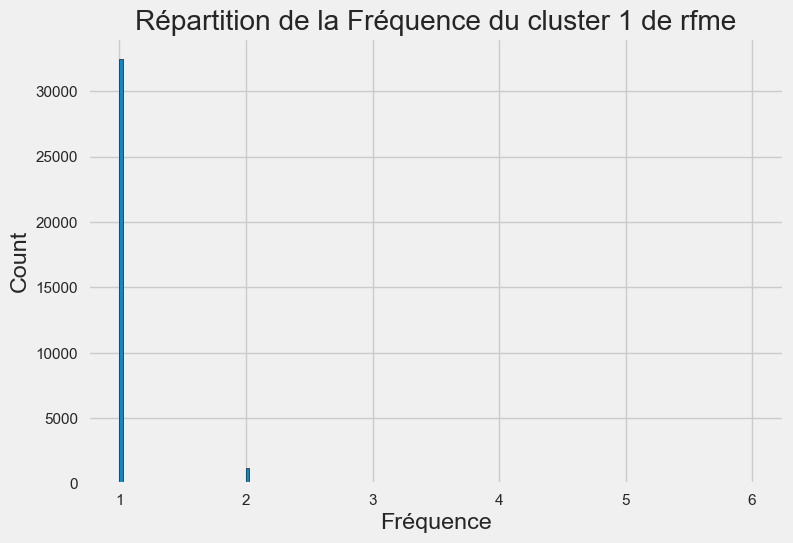

In [566]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["Frequency"].mean())
print("med:\n", df_tmp_c1["Frequency"].median())
print("mod:\n", df_tmp_c1["Frequency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["Frequency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["Frequency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["Frequency"].std() / df_tmp_c1["Frequency"].mean(),
)

print(df_tmp_c1["Frequency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["Frequency"], edgecolor="k", bins=200)
plt.title("Répartition de la Fréquence du cluster 1 de rfme")
plt.xlabel("Fréquence")
plt.ylabel("Count");

moy:
 157.15422057735012
med:
 104.62
mod:
 0    77.57
Name: Monetary, dtype: float64
Ecart type:
 198.82915200057042
Var:
 39533.03168526593
Coefficient de variation CV : 1.26520366282376
count    33775.000000
mean       157.154221
std        198.832096
min         10.070000
25%         62.000000
50%        104.620000
75%        175.850000
max       6929.310000
Name: Monetary, dtype: float64


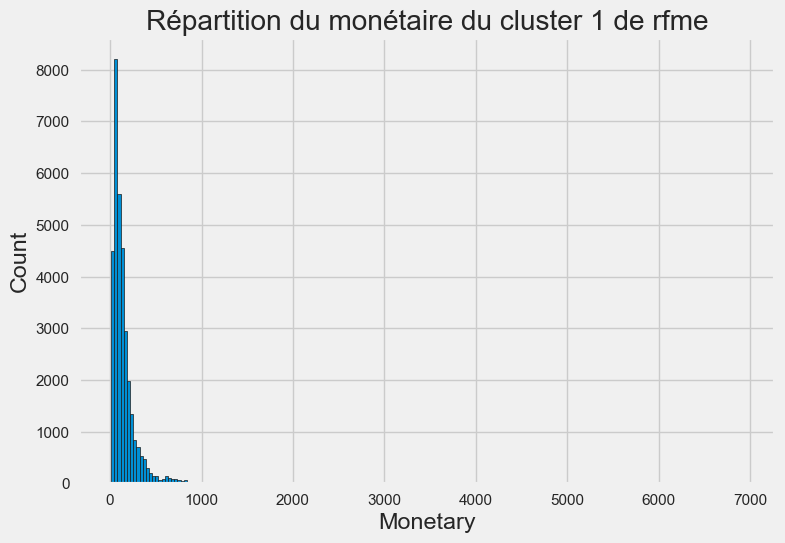

In [567]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["Monetary"].mean())
print("med:\n", df_tmp_c1["Monetary"].median())
print("mod:\n", df_tmp_c1["Monetary"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["Monetary"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["Monetary"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["Monetary"].std() / df_tmp_c1["Monetary"].mean(),
)

print(df_tmp_c1["Monetary"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["Monetary"], edgecolor="k", bins=200)
plt.title("Répartition du monétaire du cluster 1 de rfme")
plt.xlabel("Monetary")
plt.ylabel("Count");

moy:
 4.6411547002220574
med:
 5.0
mod:
 0    5.0
Name: review_score, dtype: float64
Ecart type:
 0.5876295697350351
Var:
 0.34530851122698253
Coefficient de variation CV : 0.1266146696380353
count    33775.000000
mean         4.641155
std          0.587638
min          2.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64


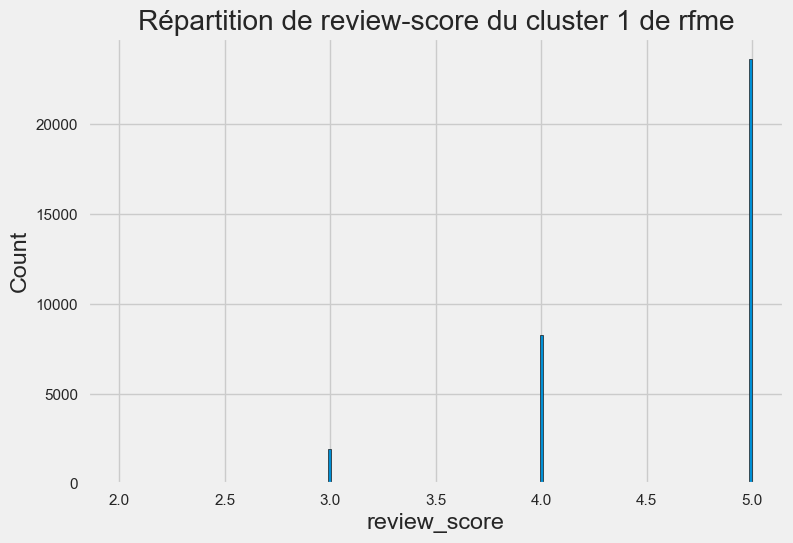

In [568]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c1["review_score"].mean())
print("med:\n", df_tmp_c1["review_score"].median())
print("mod:\n", df_tmp_c1["review_score"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c1["review_score"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c1["review_score"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c1["review_score"].std() / df_tmp_c1["review_score"].mean(),
)

print(df_tmp_c1["review_score"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c1["review_score"], edgecolor="k", bins=200)
plt.title("Répartition de review-score du cluster 1 de rfme")
plt.xlabel("review_score")
plt.ylabel("Count");

###### <a name="C822123">8.2.2.1.2.3 Clustering 2 </a>

In [569]:
df_tmp_c2 = df_tmp.loc[df_tmp["cluster_rfme_kmpp"] == 2]
df_tmp_c2.head()

,Recency,Frequency,Monetary,review_score,cluster_rfme_kmpp
customer_id,,,,,
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,5.0,2
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,5.0,2
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,5.0,2
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,5.0,2
fd826e7cf63160e536e0908c76c3f441,191.0,1.0,22.77,5.0,2


moy:
 122.1193775078144
med:
 119.0
mod:
 0    13.0
Name: Recency, dtype: float64
Ecart type:
 73.85554042248073
Var:
 5454.640851096686
Coefficient de variation CV : 0.604788204603874
count    45109.000000
mean       122.119378
std         73.856359
min          0.000000
25%         57.000000
50%        119.000000
75%        185.000000
max        346.000000
Name: Recency, dtype: float64


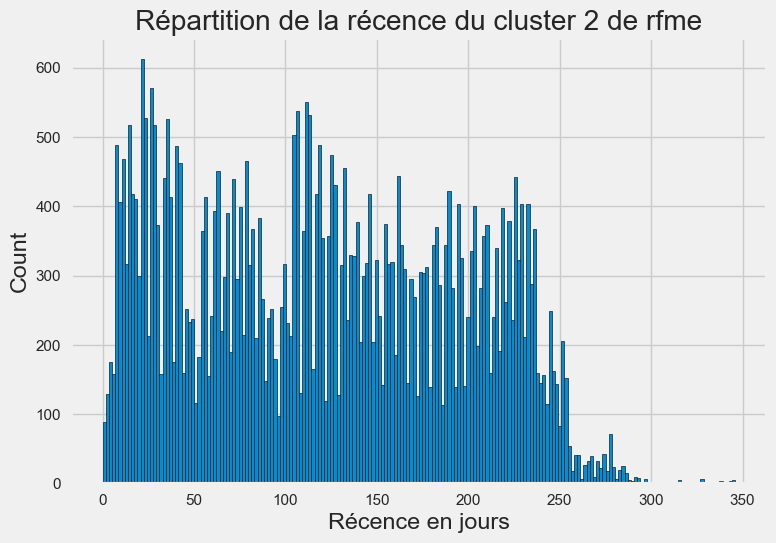

In [570]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["Recency"].mean())
print("med:\n", df_tmp_c2["Recency"].median())
print("mod:\n", df_tmp_c2["Recency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["Recency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["Recency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["Recency"].std() / df_tmp_c2["Recency"].mean(),
)

print(df_tmp_c2["Recency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["Recency"], edgecolor="k", bins=200)
plt.title("Répartition de la récence du cluster 2 de rfme")
plt.xlabel("Récence en jours")
plt.ylabel("Count");

moy:
 1.1044137533529894
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.47571103306586204
Var:
 0.22630098698058967
Coefficient de variation CV : 0.43074101949134375
count    45109.000000
mean         1.104414
std          0.475716
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: Frequency, dtype: float64


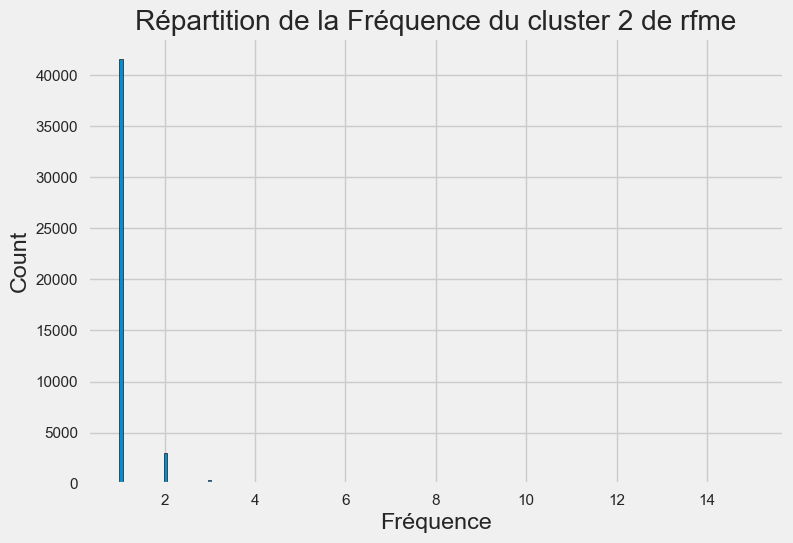

In [571]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["Frequency"].mean())
print("med:\n", df_tmp_c2["Frequency"].median())
print("mod:\n", df_tmp_c2["Frequency"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["Frequency"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["Frequency"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["Frequency"].std() / df_tmp_c2["Frequency"].mean(),
)

print(df_tmp_c2["Frequency"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["Frequency"], edgecolor="k", bins=200)
plt.title("Répartition de la Fréquence du cluster 2 de rfme")
plt.xlabel("Fréquence")
plt.ylabel("Count");

moy:
 172.046146445277
med:
 112.31
mod:
 0    99.9
Name: Monetary, dtype: float64
Ecart type:
 228.95398458700944
Var:
 52419.92705826856
Coefficient de variation CV : 1.3307855313580608
count    45109.000000
mean       172.046146
std        228.956522
min          9.590000
25%         63.730000
50%        112.310000
75%        189.370000
max       4681.780000
Name: Monetary, dtype: float64


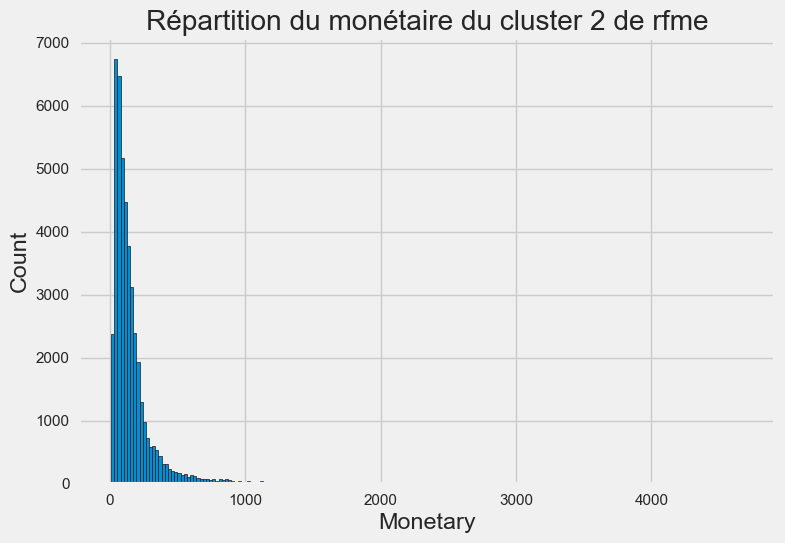

In [572]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["Monetary"].mean())
print("med:\n", df_tmp_c2["Monetary"].median())
print("mod:\n", df_tmp_c2["Monetary"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["Monetary"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["Monetary"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["Monetary"].std() / df_tmp_c2["Monetary"].mean(),
)

print(df_tmp_c2["Monetary"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["Monetary"], edgecolor="k", bins=200)
plt.title("Répartition du monétaire du cluster 2 de rfme")
plt.xlabel("Monetary")
plt.ylabel("Count");

moy:
 4.705225121372675
med:
 5.0
mod:
 0    5.0
Name: review_score, dtype: float64
Ecart type:
 0.5165761574038358
Var:
 0.26685092639811253
Coefficient de variation CV : 0.10978898353201354
count    45109.000000
mean         4.705225
std          0.516582
min          3.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64


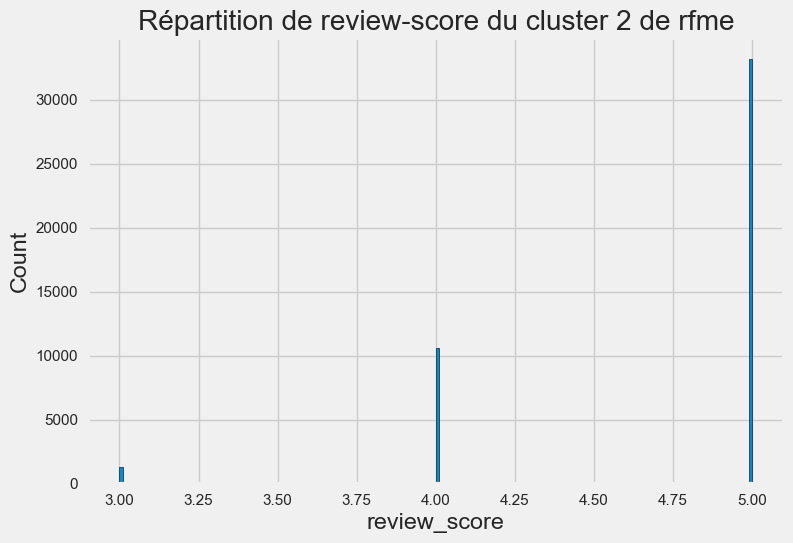

In [573]:
# Mesures de tendances centrales
print("moy:\n", df_tmp_c2["review_score"].mean())
print("med:\n", df_tmp_c2["review_score"].median())
print("mod:\n", df_tmp_c2["review_score"].mode())

# Mesures de dispersion :
print("Ecart type:\n", df_tmp_c2["review_score"].std(ddof=0))  # Ecart type empirique
print(
    "Var:\n", df_tmp_c2["review_score"].var(ddof=0)
)  # Variance empirique --> var non supporter par datetime type
print(
    "Coefficient de variation CV :",
    df_tmp_c2["review_score"].std() / df_tmp_c2["review_score"].mean(),
)

print(df_tmp_c2["review_score"].describe())

# Visualisation de la distribution
plt.style.use("fivethirtyeight")
plt.hist(df_tmp_c2["review_score"], edgecolor="k", bins=200)
plt.title("Répartition de review-score du cluster 2 de rfme")
plt.xlabel("review_score")
plt.ylabel("Count");

##### <a name="C82213">8.2.2.1.3 Comparaison clustering RFM et RFME </a>

In [574]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfm_kmpp    96667 non-null  object 
 4   cluster_rfm_kmpp_2  96667 non-null  object 
 5   cluster_rfm_ch      29000 non-null  object 
 6   cluster_rfm_dbs     96667 non-null  object 
dtypes: float64(3), object(4)
memory usage: 7.9+ MB


In [575]:
df_rfme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recency            95815 non-null  float64
 1   Frequency          95815 non-null  float64
 2   Monetary           95815 non-null  float64
 3   review_score       95815 non-null  float64
 4   cluster_rfme_kmpp  95815 non-null  object 
dtypes: float64(4), object(1)
memory usage: 6.4+ MB


In [576]:
# Merge de RFM et RFME
df_tmp = pd.merge(
    df_rfm["cluster_rfm_kmpp"],
    df_rfme,
    left_on="customer_id",
    right_on="customer_id",
    how="right",
)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cluster_rfm_kmpp   95815 non-null  object 
 1   Recency            95815 non-null  float64
 2   Frequency          95815 non-null  float64
 3   Monetary           95815 non-null  float64
 4   review_score       95815 non-null  float64
 5   cluster_rfme_kmpp  95815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 5.1+ MB


In [577]:
metrics.adjusted_rand_score(df_tmp["cluster_rfm_kmpp"], df_tmp["cluster_rfme_kmpp"])

0.5731460406557275

### <a name="C823">8.2.3 RFM + evaluation client + retard livraison </a>

In [578]:
# Selection des features
df_rfmer = df_model[
    ["Recency", "Frequency", "Monetary", "review_score", "retard_livraison"]
].copy()

# Suppression des lignes contenant au moins 1 NaN
df_rfmer.dropna(axis=0, inplace=True)

df_rfmer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           95815 non-null  float64
 1   Frequency         95815 non-null  float64
 2   Monetary          95815 non-null  float64
 3   review_score      95815 non-null  float64
 4   retard_livraison  95815 non-null  float64
dtypes: float64(5)
memory usage: 4.4+ MB


In [579]:
# Standardisation (pas d'encodage car que des floats sont présents dans dataframe
std_scaled = preprocessing.StandardScaler()
df_rfmer_scaled, std_scaled = standardisation(df_rfmer, std_scaled)

Nous avons X de forme (95815, 5)


#### <a name="C8231">8.2.3.1 K-means++</a>

##### <a name="C82311">8.2.3.1.1 Choix du nombre de clusters</a>

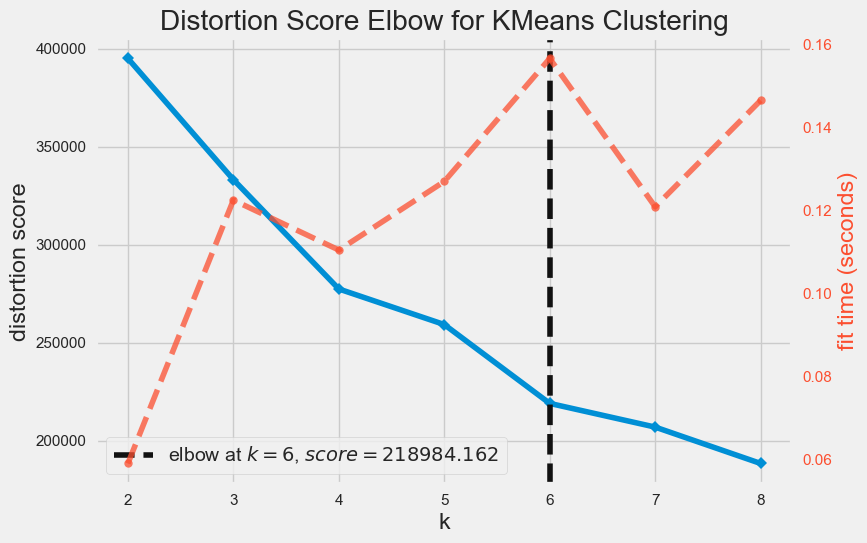

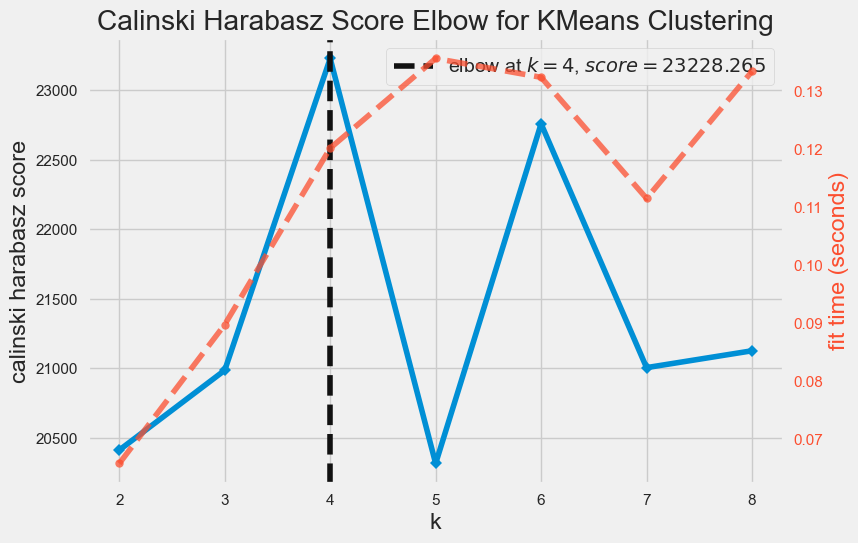

In [580]:
# Estimation du meilleur clusturing par 3 métriques

visualisation_coude(df_rfmer_scaled, "distortion")
visualisation_coude(df_rfmer_scaled, "calinski_harabasz")
# visualisation_coude(df_rfmer_scaled,'silhouette')

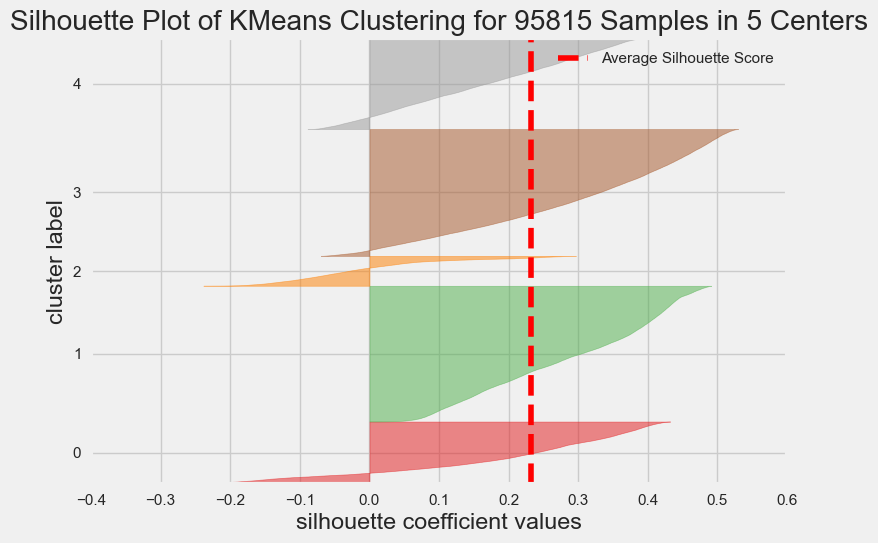

In [581]:
# Visualisation des silouhettes des clusters
# visualisation_silhouette(df_rfmer_scaled,2)
# visualisation_silhouette(df_rfmer_scaled,3)
# visualisation_silhouette(df_rfmer_scaled,4)
visualisation_silhouette(df_rfmer_scaled, 5)
# visualisation_silhouette(df_rfmer_scaled,6)

##### <a name="C82312">8.2.3.1.2 Création du clustering </a>

In [582]:
# cluster_kmeanspp(df, nb_clusters)
kmspp = cluster_kmeanspp(df_rfmer_scaled, 5)

# intégration des clusters dans la df d'origine avant transformation
df_rfmer["cluster_rfmer_kmpp"] = kmspp.labels_
df_rfmer.head()

,Recency,Frequency,Monetary,review_score,retard_livraison,cluster_rfmer_kmpp
customer_id,,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,4.0,-912265.0,3
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,5.0,-645521.0,1
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,5.0,151131.0,1
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,5.0,-1065335.0,1
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,5.0,-443052.0,1


In [583]:
df_rfmer["cluster_rfmer_kmpp"] = df_rfmer["cluster_rfmer_kmpp"].astype("object")
df_rfmer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             95815 non-null  float64
 1   Frequency           95815 non-null  float64
 2   Monetary            95815 non-null  float64
 3   review_score        95815 non-null  float64
 4   retard_livraison    95815 non-null  float64
 5   cluster_rfmer_kmpp  95815 non-null  object 
dtypes: float64(5), object(1)
memory usage: 7.1+ MB


In [584]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "Recency", "Frequency", "Monetary", "cluster_rfmer_kmpp")

In [585]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "review_score", "Frequency", "Monetary", "cluster_rfmer_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "Recency", "review_score", "Monetary", "cluster_rfmer_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "Recency", "Frequency", "review_score", "cluster_rfmer_kmpp")

In [586]:
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "retard_livraison", "Frequency", "Monetary", "cluster_rfmer_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "Recency", "retard_livraison", "Monetary", "cluster_rfmer_kmpp")
# affichage3D(df,x,y,z,color)
affichage3D(df_rfmer, "Recency", "Frequency", "retard_livraison", "cluster_rfmer_kmpp")

In [587]:
# affichage3D(df,x,y,z,color)
affichage3D(
    df_rfmer, "review_score", "retard_livraison", "Recency", "cluster_rfmer_kmpp"
)

# affichage3D(df,x,y,z,color)
affichage3D(
    df_rfmer, "review_score", "retard_livraison", "Frequency", "cluster_rfmer_kmpp"
)

# affichage3D(df,x,y,z,color)
affichage3D(
    df_rfmer, "review_score", "retard_livraison", "Monetary", "cluster_rfmer_kmpp"
)

In [588]:
# Proportion de clusters
df_tmp = df_rfmer["cluster_rfmer_kmpp"].value_counts()
df_tmp = pd.DataFrame(df_tmp).reset_index()
df_tmp.set_axis(["cluster_rfmer_kmpp", "qte"], axis="columns", inplace=True)
df_tmp.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\2022046035.py:4: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,cluster_rfmer_kmpp,qte
0,1,29204
1,3,27280
2,4,19534
3,0,13371
4,2,6426


Text(0.5, 1.0, 'Répartition des clusters kmeans++ de RFMER')

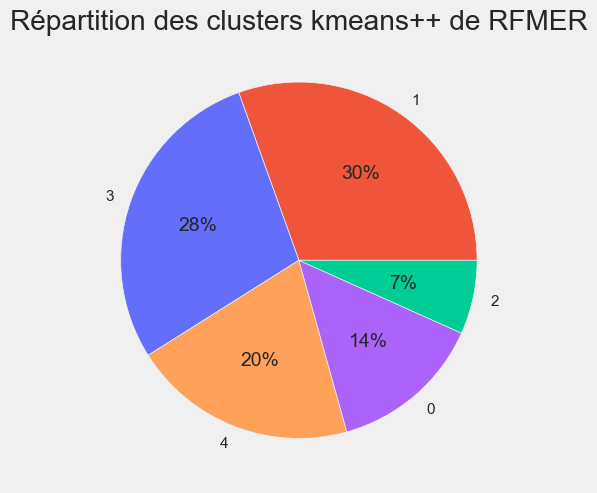

In [589]:
# colors = sns.color_palette('pastel')[0:5]
# 636EFA : bleu 3
# EF553B : rouge 1
# 00CC96 : vert 2
# AB63FA : violet 0
# FFA15A : jaune 4


colors = ["#EF553B", "#636EFA", "#FFA15A", "#AB63FA", "#00CC96"]
plt.pie(
    df_tmp["qte"], labels=df_tmp["cluster_rfmer_kmpp"], colors=colors, autopct="%.0f%%"
)
plt.title("Répartition des clusters kmeans++ de RFMER")

In [590]:
df_tmp = df_rfmer[
    [
        "Recency",
        "Frequency",
        "Monetary",
        "review_score",
        "retard_livraison",
        "cluster_rfmer_kmpp",
    ]
]
df_tmp.head()

,Recency,Frequency,Monetary,review_score,retard_livraison,cluster_rfmer_kmpp
customer_id,,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,4.0,-912265.0,3
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,5.0,-645521.0,1
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,5.0,151131.0,1
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,5.0,-1065335.0,1
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,5.0,-443052.0,1


<AxesSubplot: title={'center': 'Récence par cluster rfmer'}, xlabel='cluster_rfmer_kmpp', ylabel='Recency'>

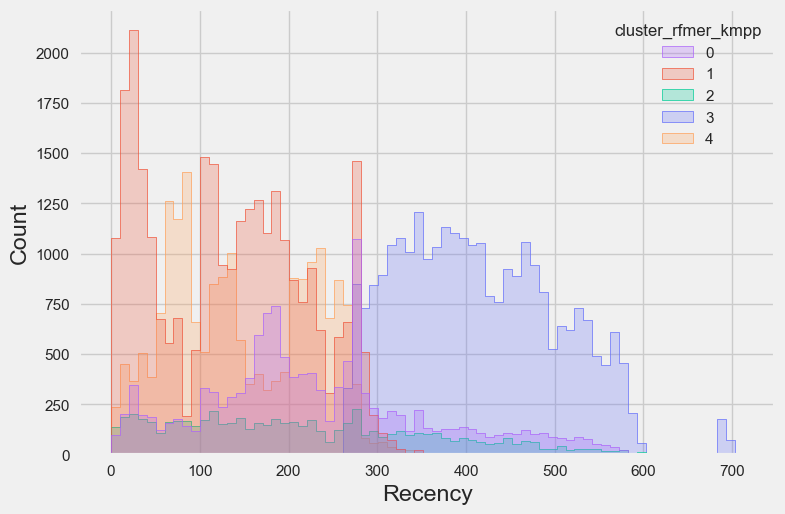

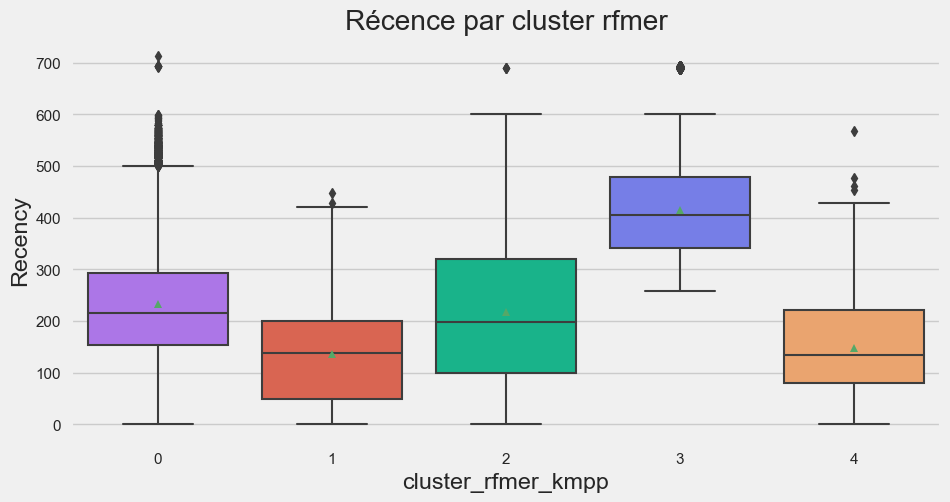

In [591]:
sns.histplot(
    data=df_tmp,
    x="Recency",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("Récence par cluster rfmer")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfmer_kmpp",
    y="Recency",
    data=df_tmp,
    showmeans=True,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

<AxesSubplot: title={'center': 'Fréquence par cluster rfmer'}, xlabel='cluster_rfmer_kmpp', ylabel='Frequency'>

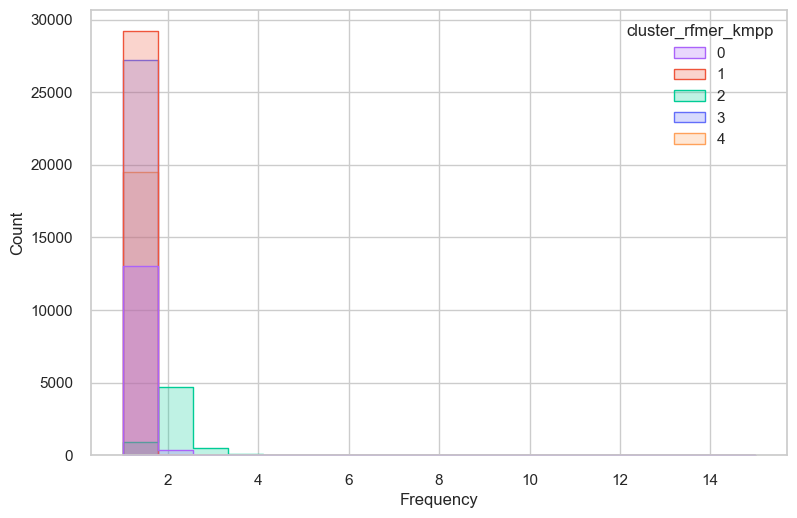

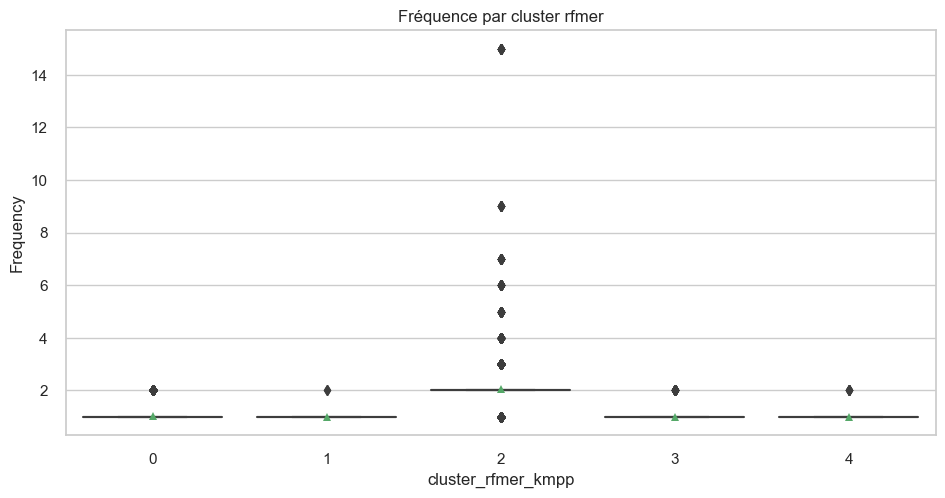

In [592]:
sns.histplot(
    data=df_tmp,
    x="Frequency",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence par cluster rfmer")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfmer_kmpp",
    y="Frequency",
    data=df_tmp,
    showmeans=True,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

<AxesSubplot: title={'center': 'Fréquence (=1) par cluster'}, xlabel='cluster_rfmer_kmpp', ylabel='Frequency'>

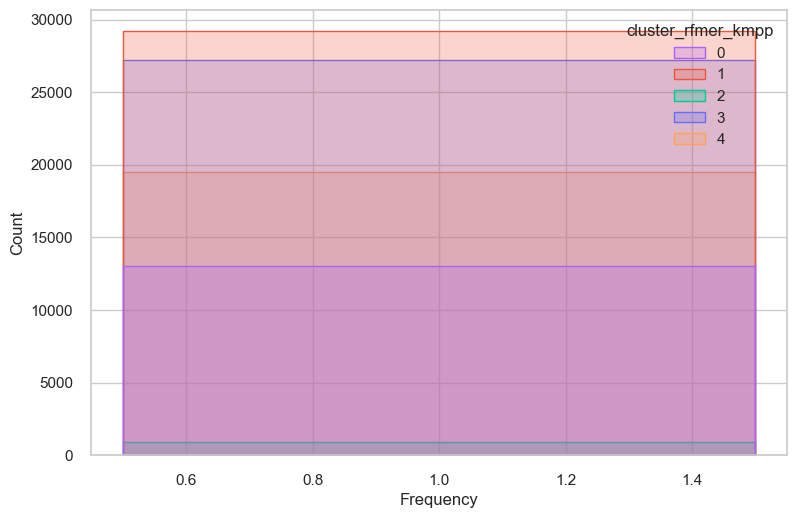

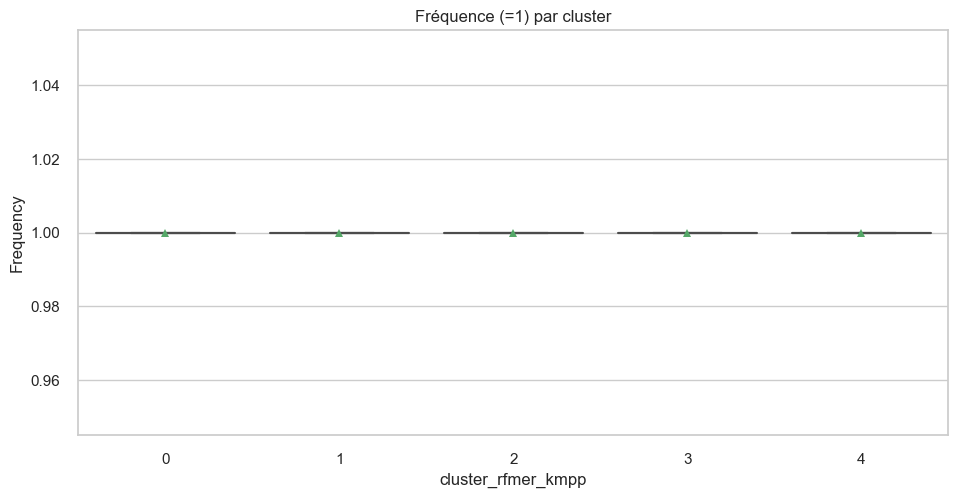

In [593]:
df_tmp2 = df_tmp.loc[df_tmp["Frequency"] == 1]
sns.histplot(
    data=df_tmp2,
    x="Frequency",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("Fréquence (=1) par cluster")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfmer_kmpp", y="Frequency", data=df_tmp2, showmeans=True)

<AxesSubplot: title={'center': 'Monetary par cluster rfmer'}, xlabel='cluster_rfmer_kmpp', ylabel='Monetary'>

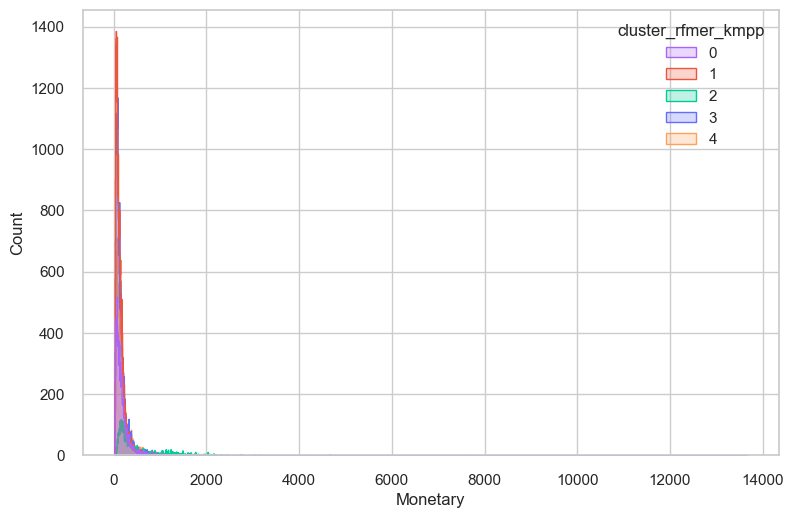

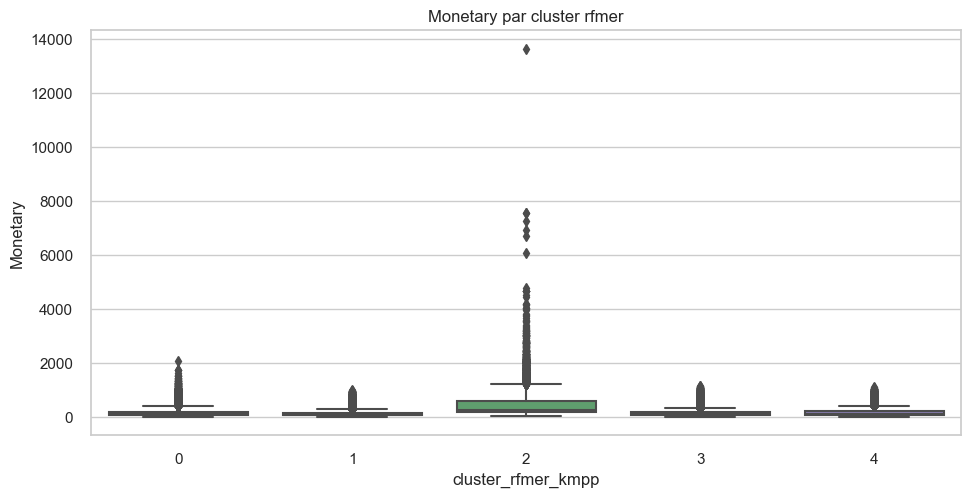

In [594]:
sns.histplot(
    data=df_tmp,
    x="Monetary",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("Monetary par cluster rfmer")
sns.set(style="whitegrid")
sns.boxplot(x="cluster_rfmer_kmpp", y="Monetary", data=df_tmp, showmeans=False)

<AxesSubplot: title={'center': 'Monetary (<600) par cluster rfmer'}, xlabel='cluster_rfmer_kmpp', ylabel='Monetary'>

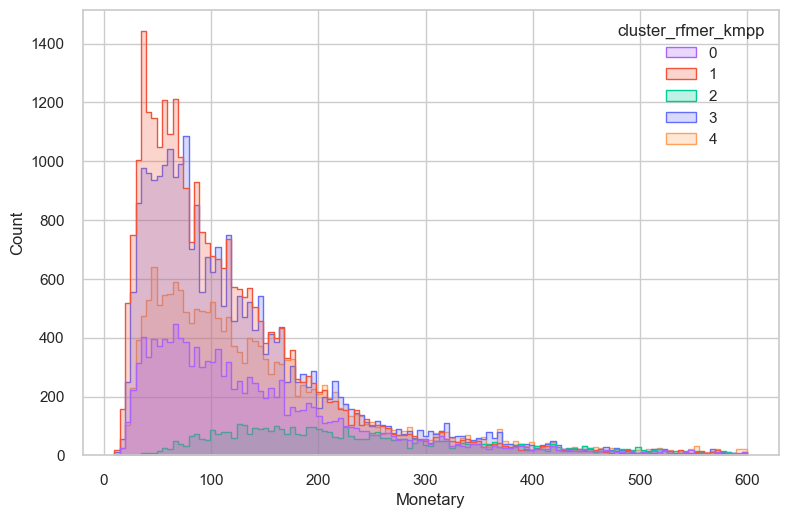

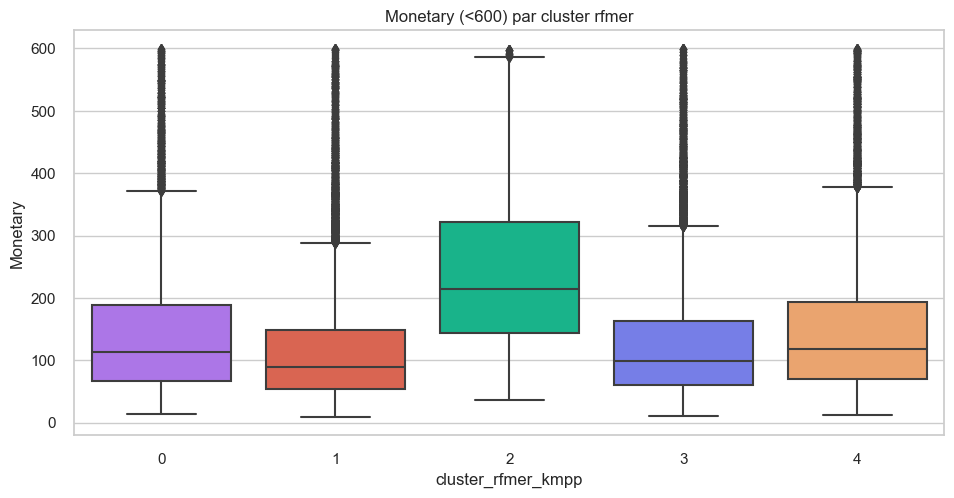

In [595]:
df_tmp2 = df_tmp.loc[df_tmp["Monetary"] < 600]
sns.histplot(
    data=df_tmp2,
    x="Monetary",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("Monetary (<600) par cluster rfmer")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfmer_kmpp",
    y="Monetary",
    data=df_tmp2,
    showmeans=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

<AxesSubplot: title={'center': 'Review-score par cluster rfmer'}, xlabel='cluster_rfmer_kmpp', ylabel='review_score'>

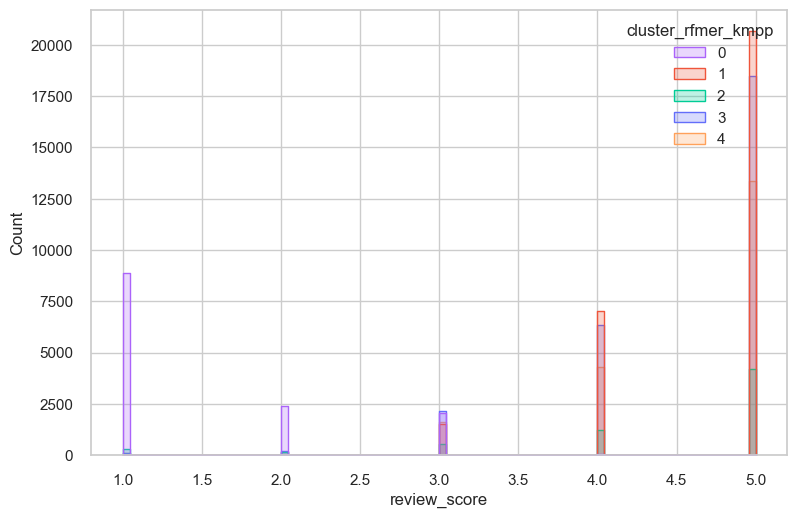

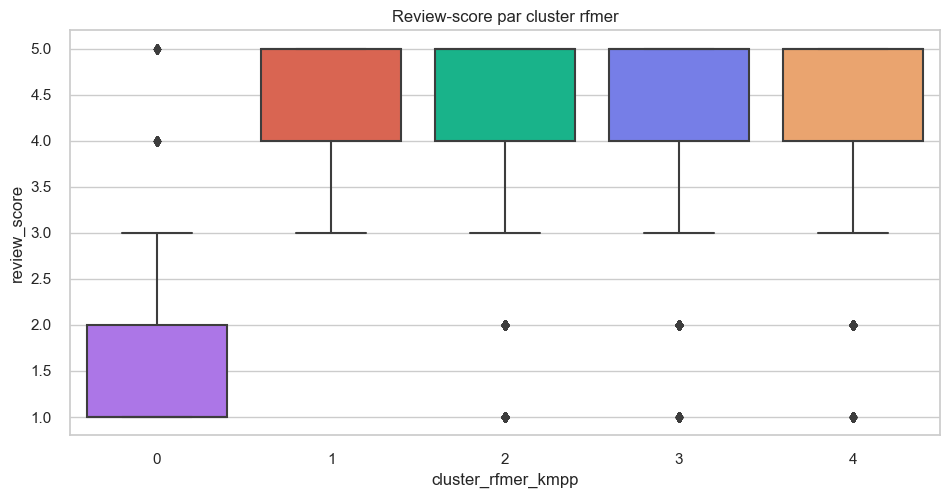

In [596]:
sns.histplot(
    data=df_tmp,
    x="review_score",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("Review-score par cluster rfmer")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfmer_kmpp",
    y="review_score",
    data=df_tmp,
    showmeans=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

<AxesSubplot: title={'center': 'retard_livraison par cluster rfmer'}, xlabel='cluster_rfmer_kmpp', ylabel='retard_livraison'>

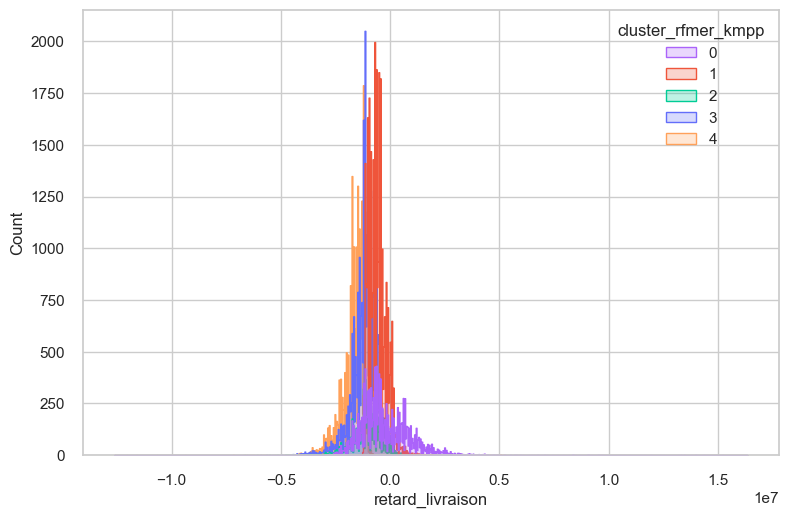

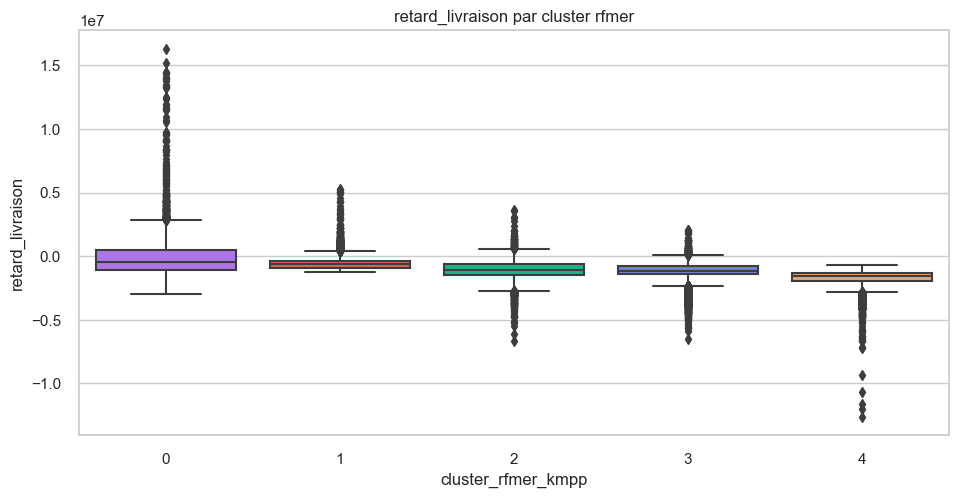

In [597]:
sns.histplot(
    data=df_tmp,
    x="retard_livraison",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("retard_livraison par cluster rfmer")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfmer_kmpp",
    y="retard_livraison",
    data=df_tmp,
    showmeans=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\2769957024.py:5: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



<AxesSubplot: title={'center': 'retard_livraison par cluster rfmer zoom '}, xlabel='cluster_rfmer_kmpp', ylabel='retard_livraison'>

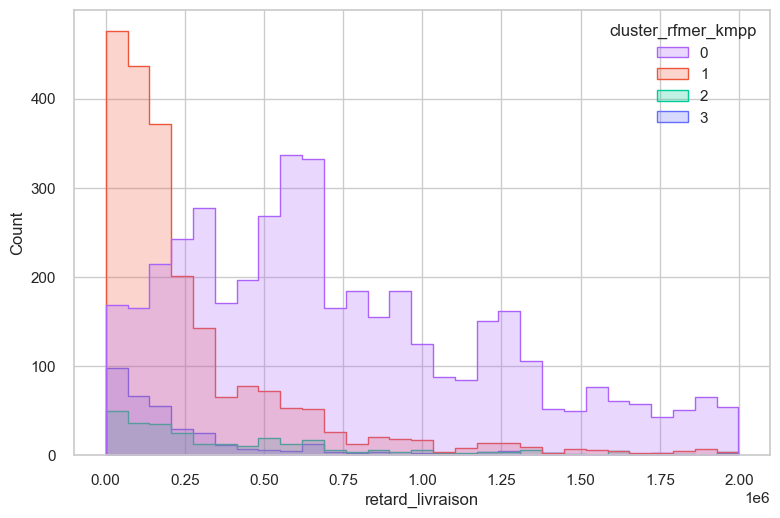

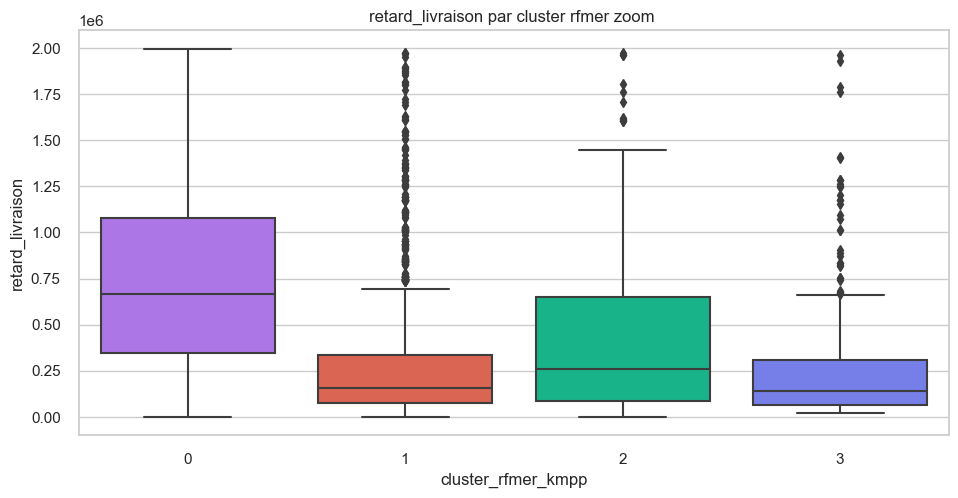

In [598]:
df_tmp2 = df_tmp.loc[
    (df_tmp["retard_livraison"] < 2e6) & (df_tmp["retard_livraison"] > 0)
]

sns.histplot(
    data=df_tmp2,
    x="retard_livraison",
    hue="cluster_rfmer_kmpp",
    element="step",
    kde=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

plt.figure(figsize=(10, 5))
plt.title("retard_livraison par cluster rfmer zoom ")
sns.set(style="whitegrid")
sns.boxplot(
    x="cluster_rfmer_kmpp",
    y="retard_livraison",
    data=df_tmp2,
    showmeans=False,
    palette=["#AB63FA", "#EF553B", "#00CC96", "#636EFA", "#FFA15A"],
)

###### <a name="C823121">8.2.3.1.2.1 Clustering 0</a>

---------------------------------
Recency
moy:
 232.70368708398775
med:
 215.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 126.55018104138952
Var:
 16014.948321608463
Coefficient de variation CV : 0.5438457600558572
count    13371.000000
mean       232.703687
std        126.554914
min          0.000000
25%        153.000000
50%        215.000000
75%        292.000000
max        713.000000
Name: Recency, dtype: float64
---------------------------------
---------------------------------
Frequency
moy:
 1.0252037992670706
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.15674363709438333
Var:
 0.02456856776957574
Coefficient de variation CV : 0.15289594016660465
count    13371.000000
mean         1.025204
std          0.156749
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Frequency, dtype: float64
---------------------------------
---------------------------------
Monetary
moy:
 16

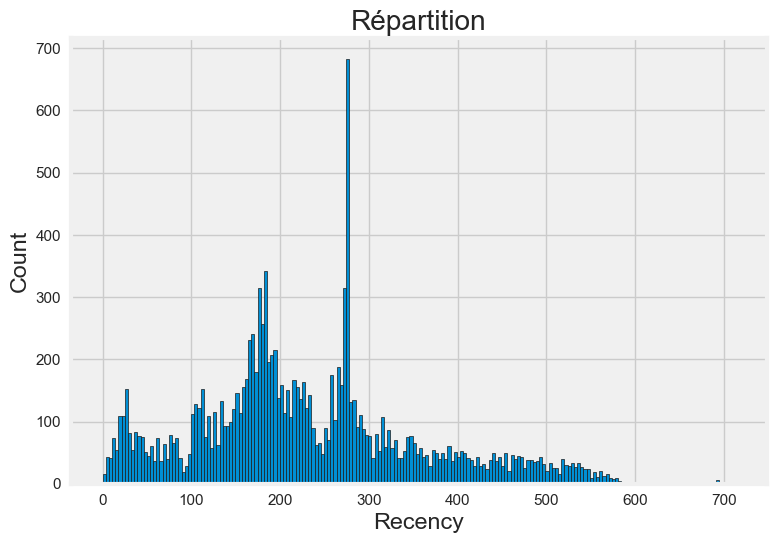

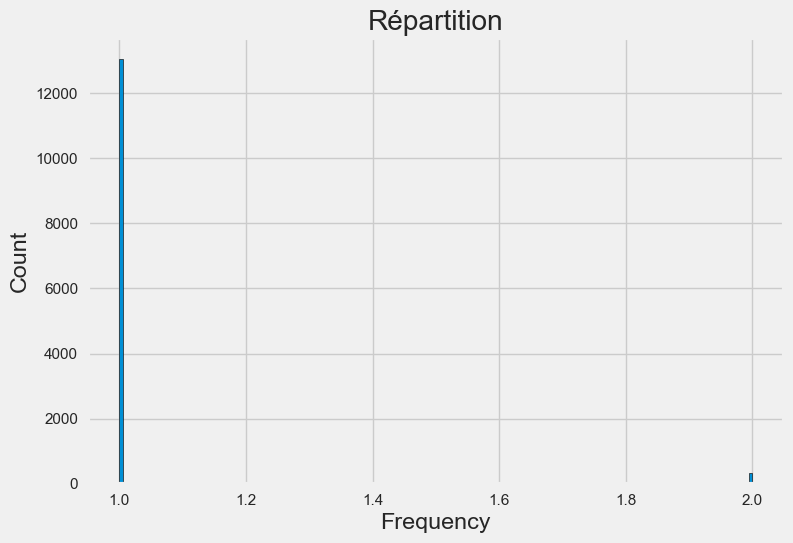

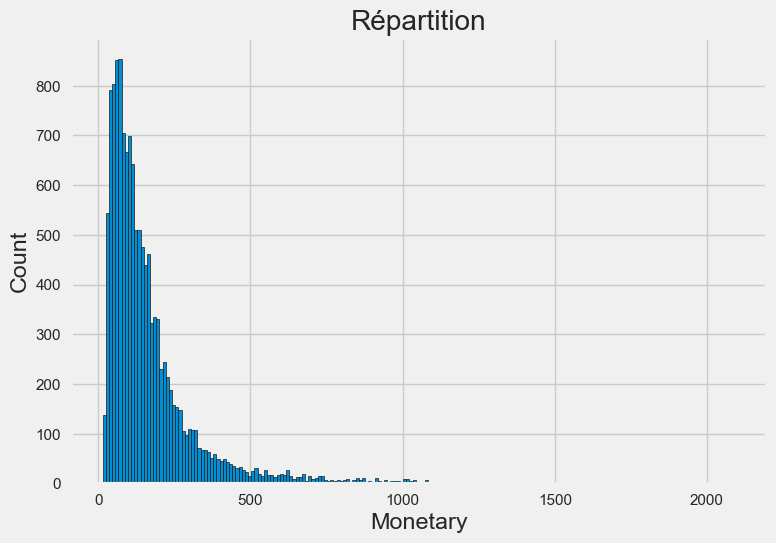

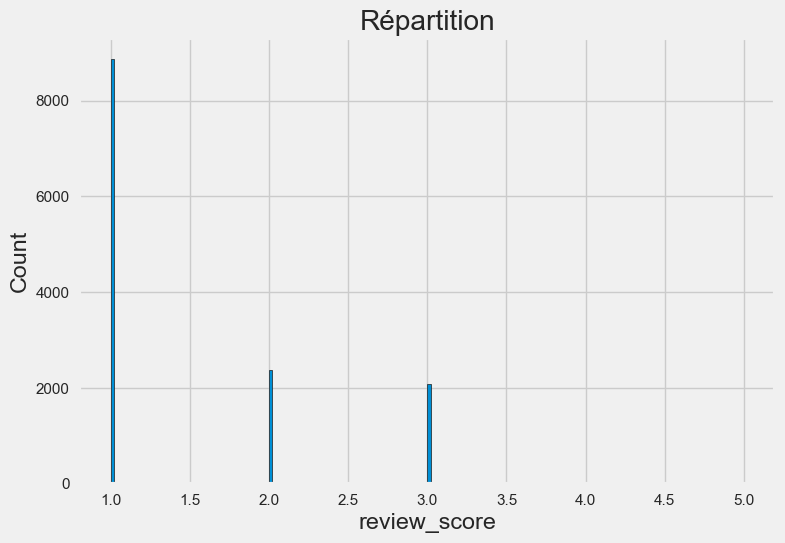

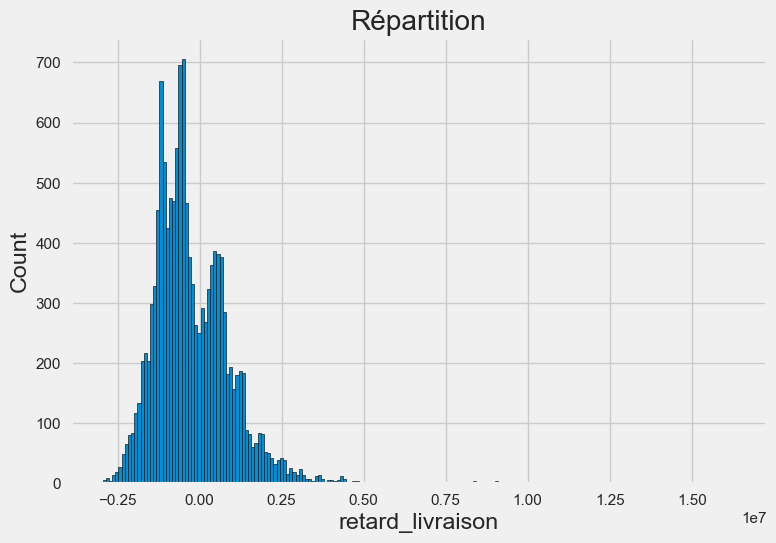

In [599]:
df_tmp_c0 = df_tmp.loc[df_tmp["cluster_rfmer_kmpp"] == 0]
univarie(df_tmp_c0, "Recency", 200)
univarie(df_tmp_c0, "Frequency", 200)
univarie(df_tmp_c0, "Monetary", 200)
univarie(df_tmp_c0, "review_score", 200)
univarie(df_tmp_c0, "retard_livraison", 200)

###### <a name="C823122">8.2.3.1.2.2 Clustering 1</a>

---------------------------------
Recency
moy:
 135.14590467059307
med:
 137.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 86.23619178273445
Var:
 7436.6807731885565
Coefficient de variation CV : 0.6381078914356801
count    29204.000000
mean       135.145905
std         86.237668
min          0.000000
25%         48.000000
50%        137.000000
75%        199.000000
max        448.000000
Name: Recency, dtype: float64
---------------------------------
---------------------------------
Frequency
moy:
 1.0000684837693468
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.00827520871760954
Var:
 6.847907932000093e-05
Coefficient de variation CV : 0.008274783712240304
count    29204.000000
mean         1.000068
std          0.008275
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Frequency, dtype: float64
---------------------------------
---------------------------------
Monetary
moy:
 

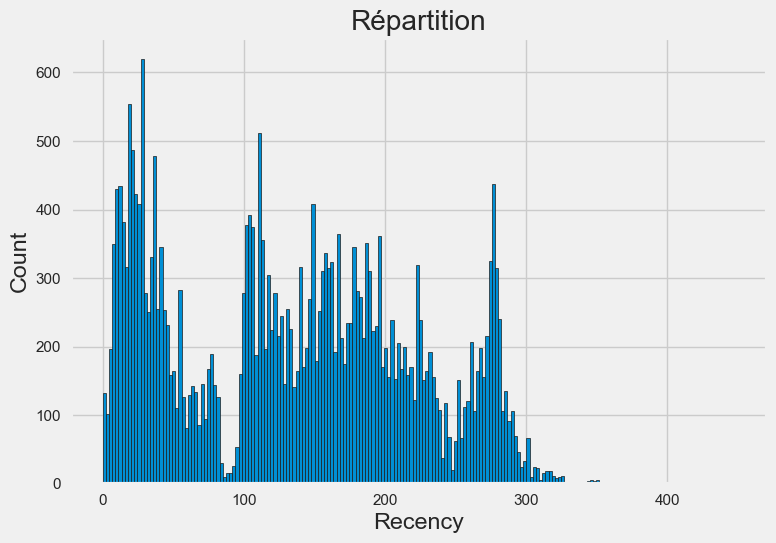

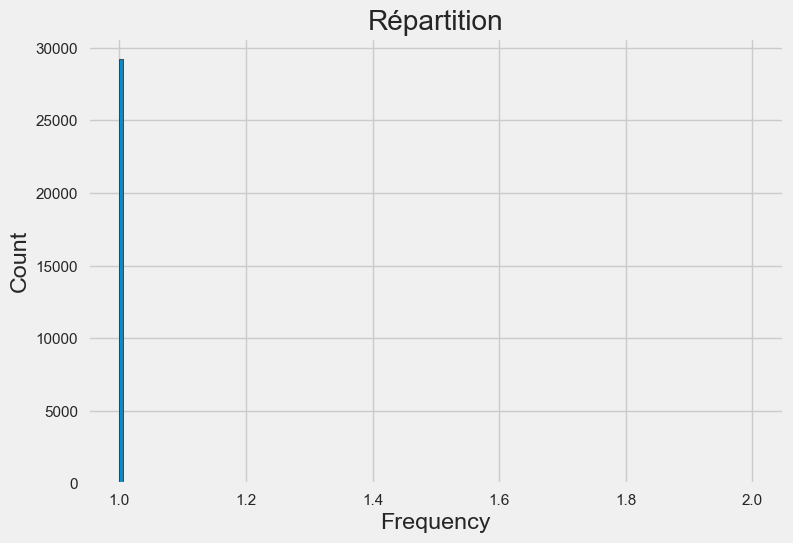

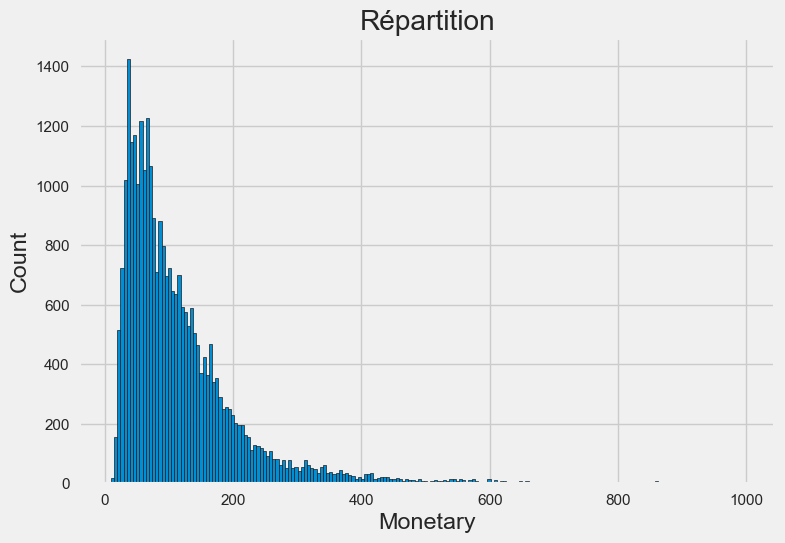

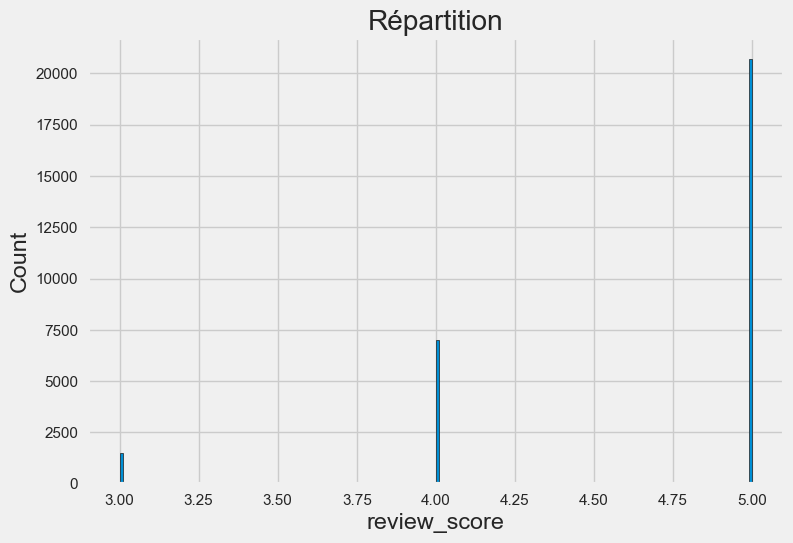

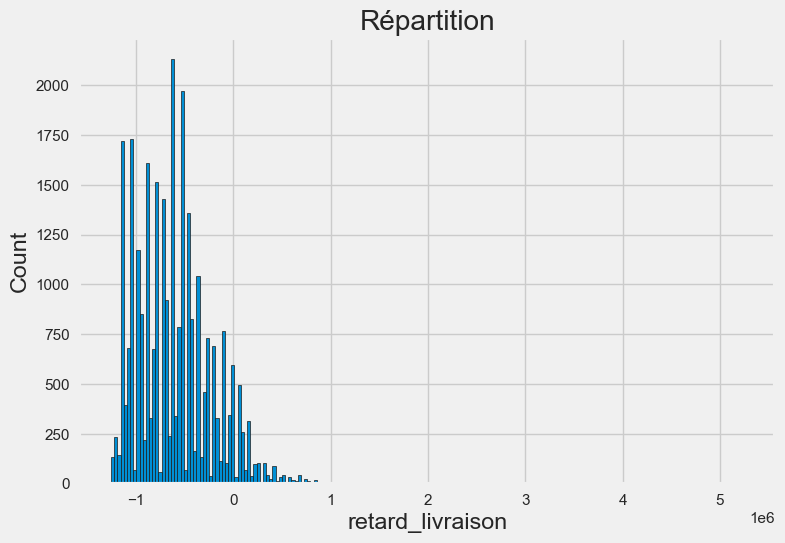

In [600]:
df_tmp_c1 = df_tmp.loc[df_tmp["cluster_rfmer_kmpp"] == 1]
univarie(df_tmp_c1, "Recency", 200)
univarie(df_tmp_c1, "Frequency", 200)
univarie(df_tmp_c1, "Monetary", 200)
univarie(df_tmp_c1, "review_score", 200)
univarie(df_tmp_c1, "retard_livraison", 200)

###### <a name="C823123">8.2.3.1.2.3 Clustering 2</a>

---------------------------------
Recency
moy:
 217.35356364768128
med:
 197.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 144.04572314142658
Var:
 20749.17035533652
Coefficient de variation CV : 0.6627769523148603
count    6426.000000
mean      217.353564
std       144.056932
min         0.000000
25%       100.000000
50%       197.000000
75%       319.000000
max       690.000000
Name: Recency, dtype: float64
---------------------------------
---------------------------------
Frequency
moy:
 2.0672268907563027
med:
 2.0
mod:
 0    2.0
Name: Frequency, dtype: float64
Ecart type:
 0.9889647876741913
Var:
 0.9780513512594583
Coefficient de variation CV : 0.4784388938353186
count    6426.000000
mean        2.067227
std         0.989042
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        15.000000
Name: Frequency, dtype: float64
---------------------------------
---------------------------------
Monetary
moy:
 522.746344537815
med:


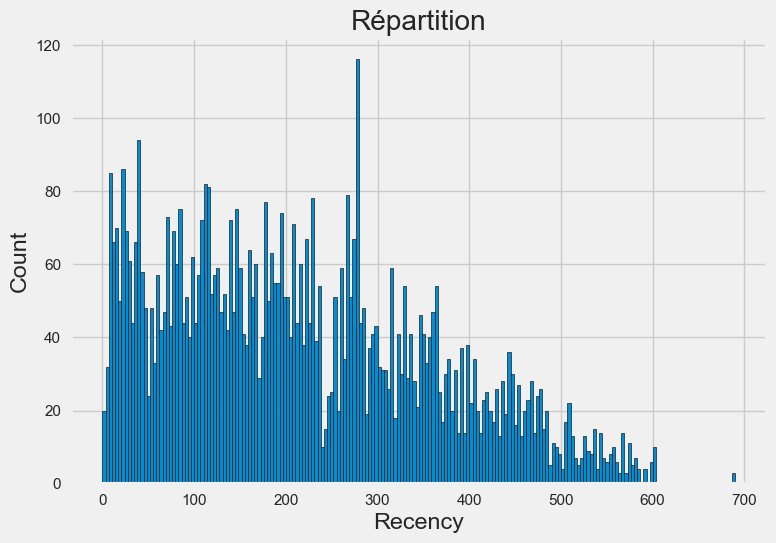

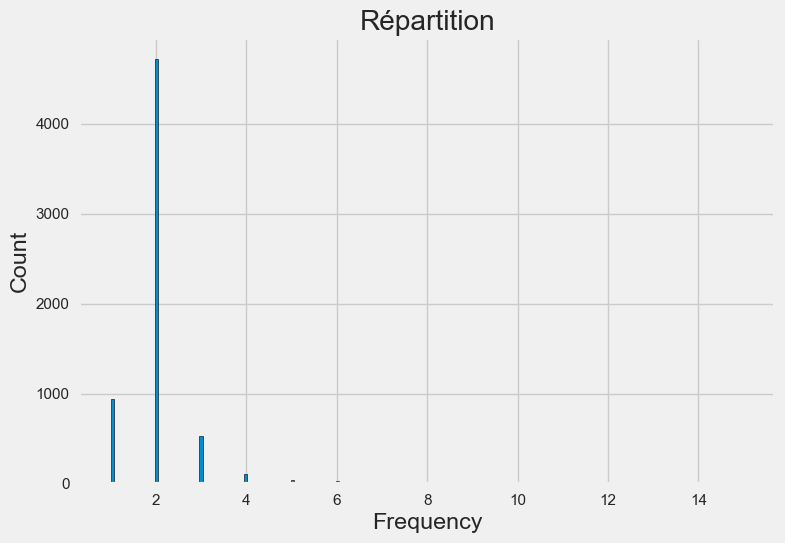

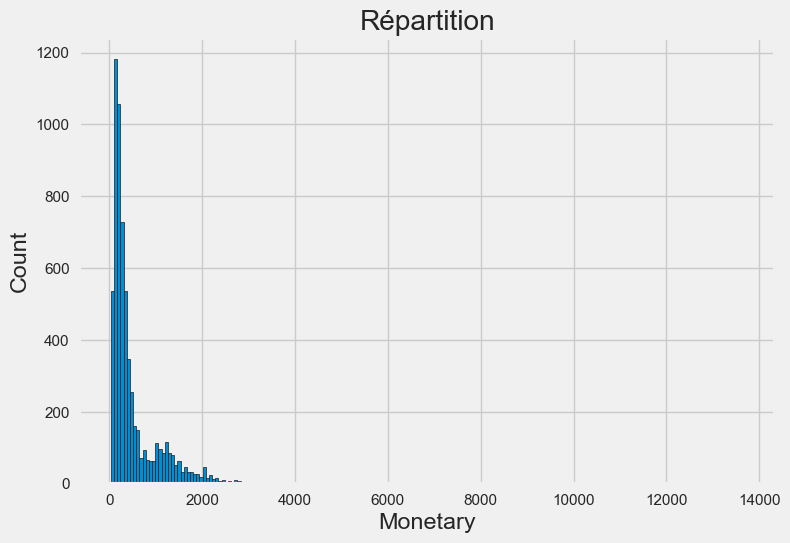

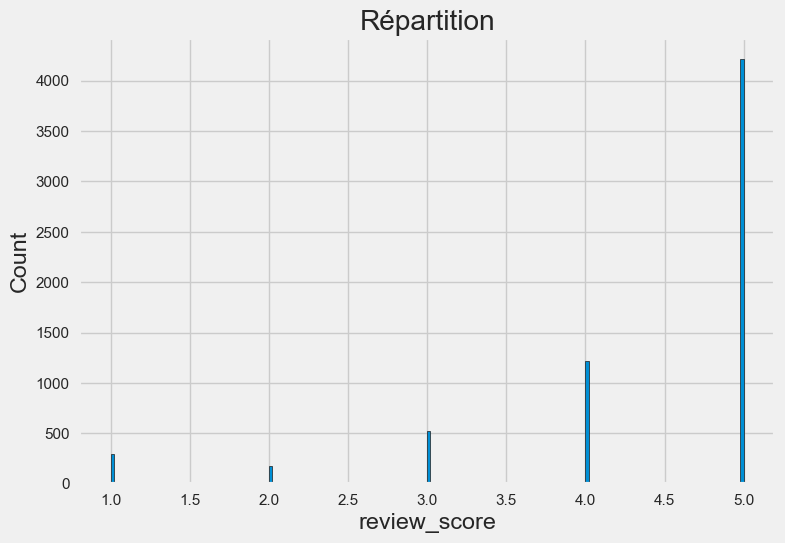

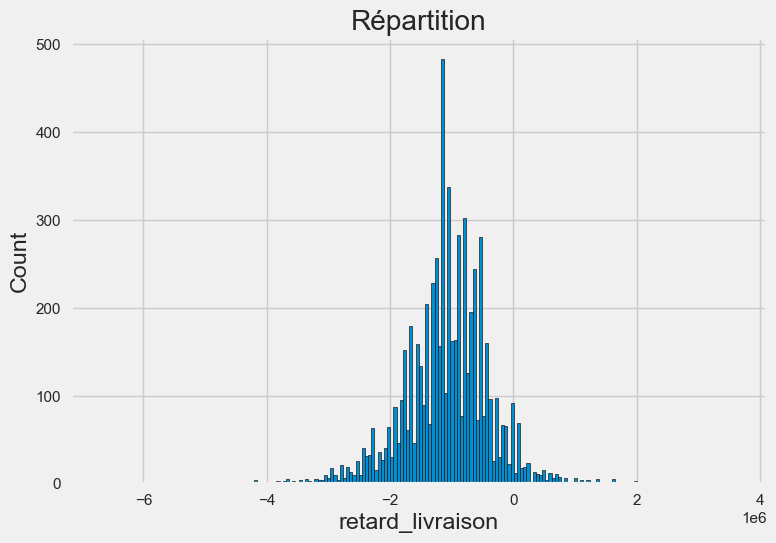

In [601]:
df_tmp_c2 = df_tmp.loc[df_tmp["cluster_rfmer_kmpp"] == 2]
univarie(df_tmp_c2, "Recency", 200)
univarie(df_tmp_c2, "Frequency", 200)
univarie(df_tmp_c2, "Monetary", 200)
univarie(df_tmp_c2, "review_score", 200)
univarie(df_tmp_c2, "retard_livraison", 200)

###### <a name="C823124">8.2.3.1.2.4 Clustering 3</a>

---------------------------------
Recency
moy:
 414.1070014662757
med:
 405.0
mod:
 0    277.0
Name: Recency, dtype: float64
Ecart type:
 89.13671060110936
Var:
 7945.353176785921
Coefficient de variation CV : 0.21525437644804038
count    27280.000000
mean       414.107001
std         89.138344
min        258.000000
25%        342.000000
50%        405.000000
75%        479.000000
max        694.000000
Name: Recency, dtype: float64
---------------------------------
---------------------------------
Frequency
moy:
 1.0015029325513196
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.03873853049698494
Var:
 0.001500673745065832
Coefficient de variation CV : 0.03868110544107195
count    27280.000000
mean         1.001503
std          0.038739
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Frequency, dtype: float64
---------------------------------
---------------------------------
Monetary
moy:
 141

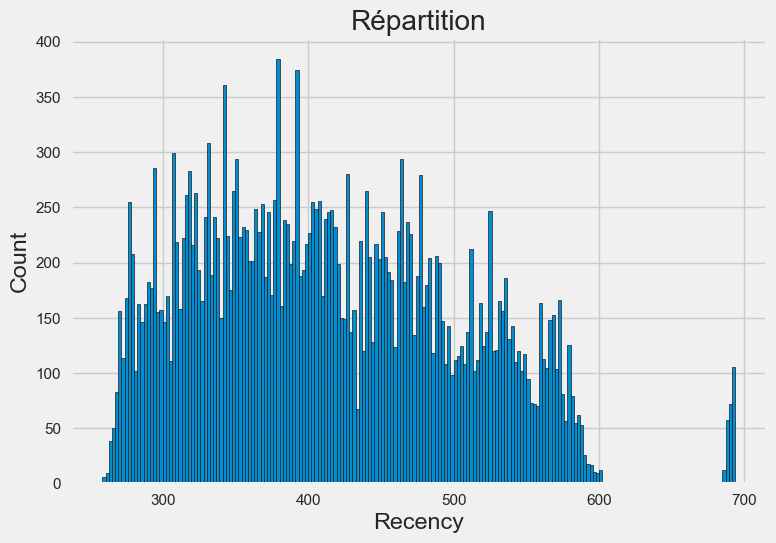

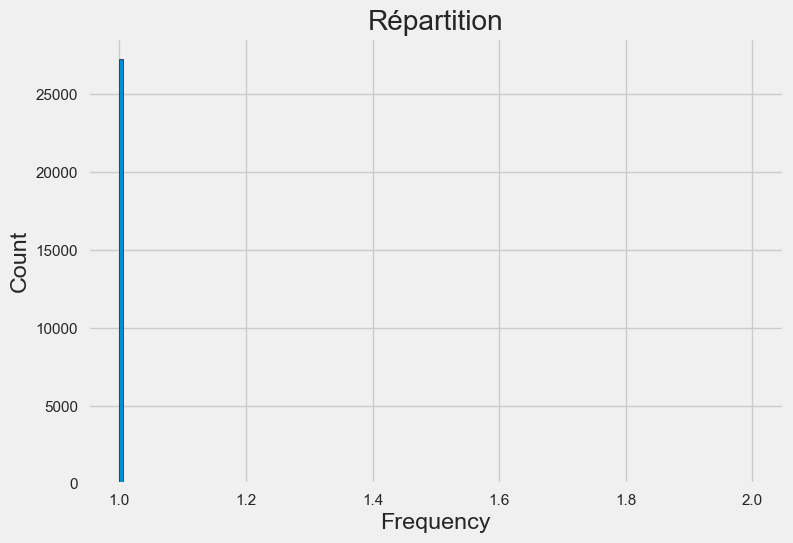

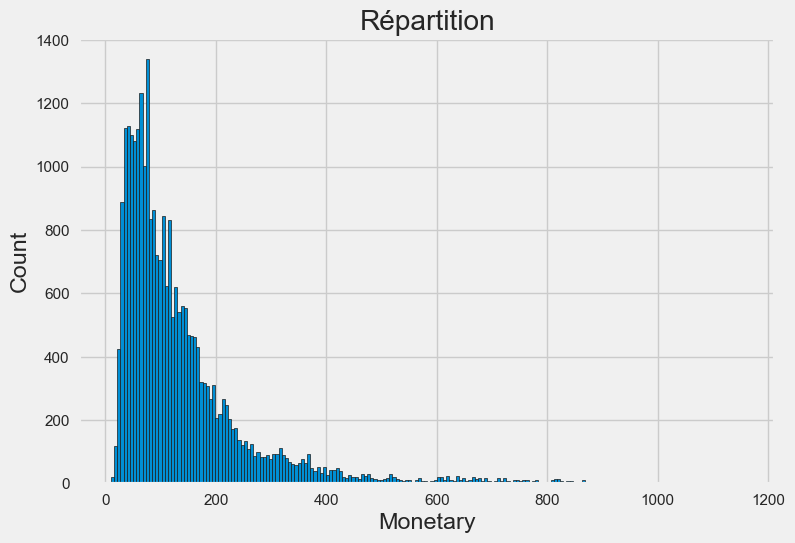

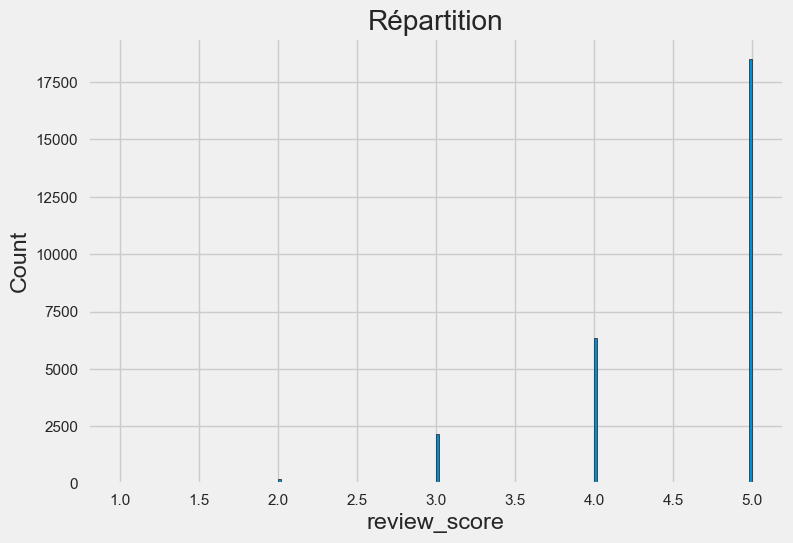

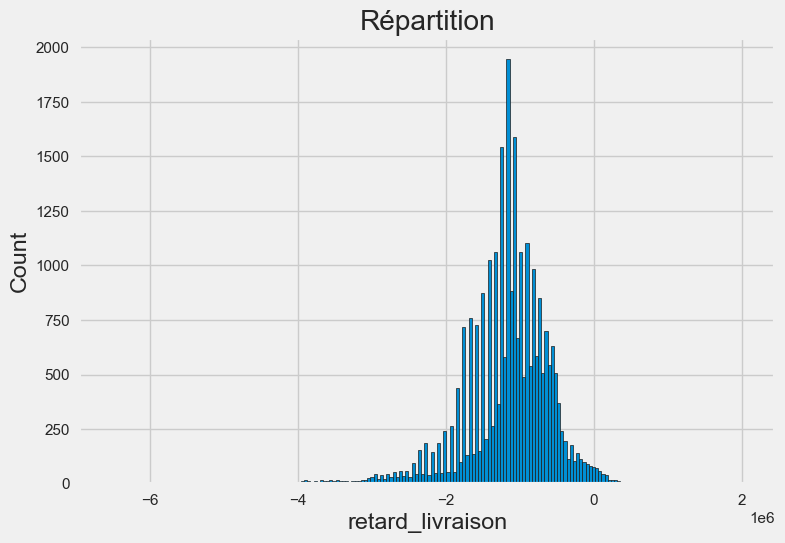

In [602]:
df_tmp_c3 = df_tmp.loc[df_tmp["cluster_rfmer_kmpp"] == 3]
univarie(df_tmp_c3, "Recency", 200)
univarie(df_tmp_c3, "Frequency", 200)
univarie(df_tmp_c3, "Monetary", 200)
univarie(df_tmp_c3, "review_score", 200)
univarie(df_tmp_c3, "retard_livraison", 200)

###### <a name="C823125">8.2.3.1.2.5 Clustering 4</a>

---------------------------------
Recency
moy:
 146.85952697860142
med:
 134.0
mod:
 0    84.0
Name: Recency, dtype: float64
Ecart type:
 79.65609779124647
Var:
 6345.09391532862
Coefficient de variation CV : 0.542410413661245
count    19534.000000
mean       146.859527
std         79.658137
min          0.000000
25%         79.000000
50%        134.000000
75%        221.000000
max        567.000000
Name: Recency, dtype: float64
---------------------------------
---------------------------------
Frequency
moy:
 1.0003071567523292
med:
 1.0
mod:
 0    1.0
Name: Frequency, dtype: float64
Ecart type:
 0.017523196256926717
Var:
 0.00030706240705877057
Coefficient de variation CV : 0.017518263951757797
count    19534.000000
mean         1.000307
std          0.017524
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Frequency, dtype: float64
---------------------------------
---------------------------------
Monetary
moy:
 16

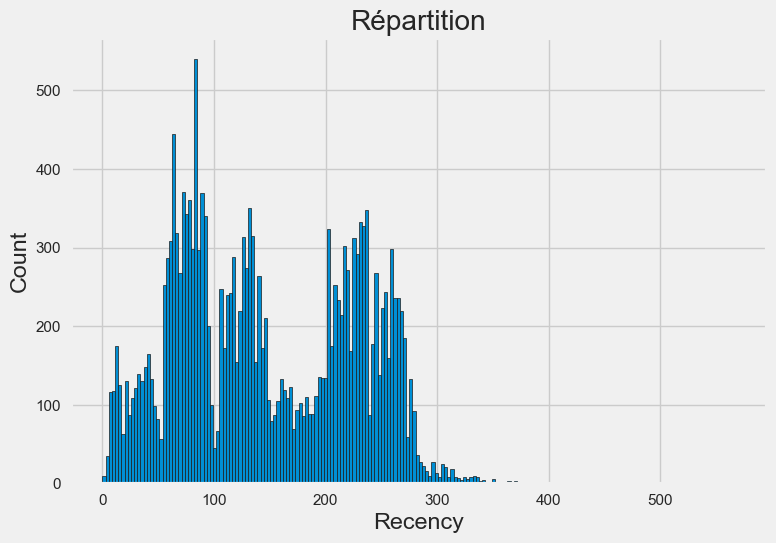

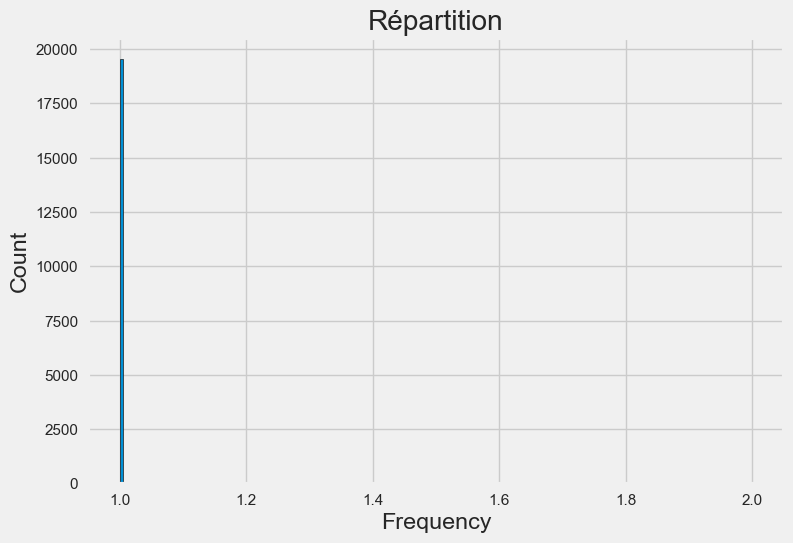

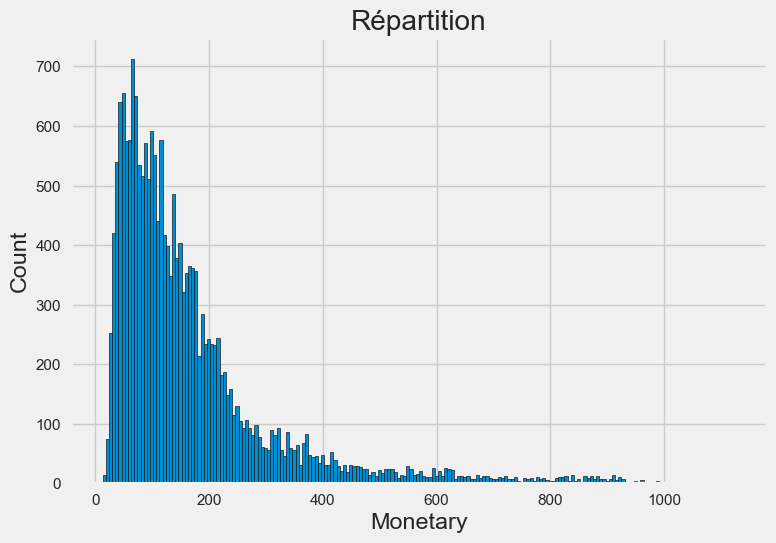

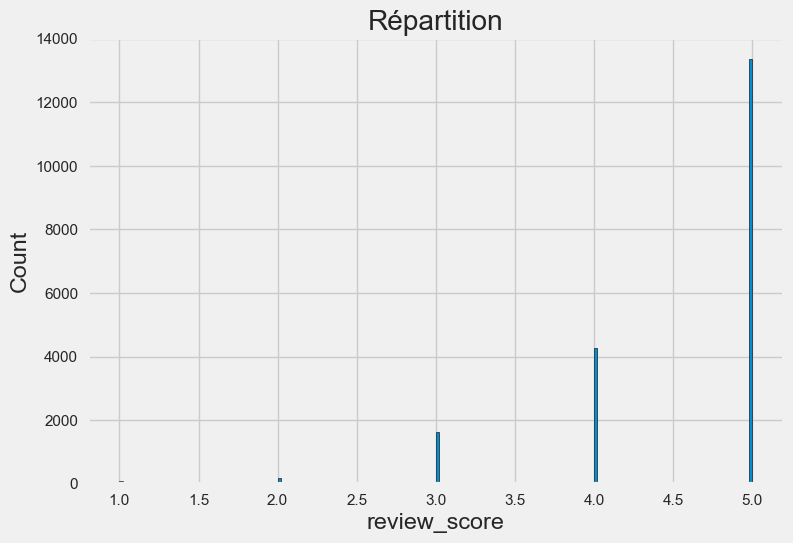

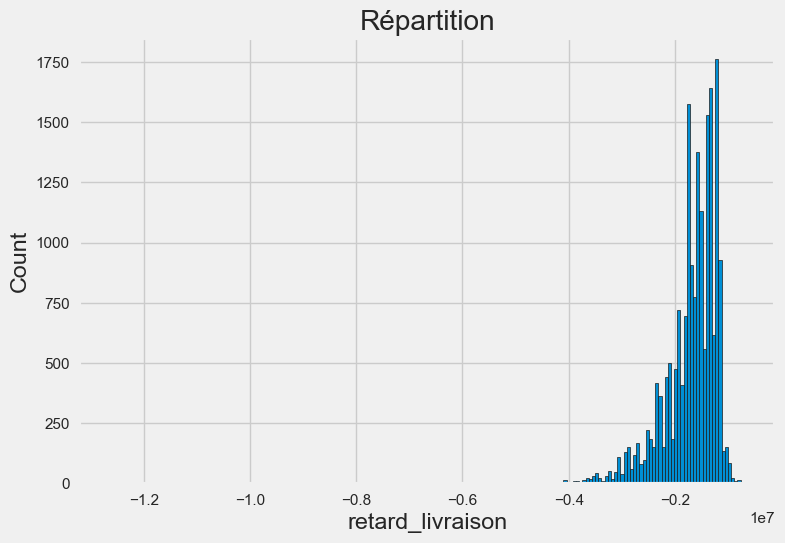

In [603]:
df_tmp_c4 = df_tmp.loc[df_tmp["cluster_rfmer_kmpp"] == 4]
univarie(df_tmp_c4, "Recency", 200)
univarie(df_tmp_c4, "Frequency", 200)
univarie(df_tmp_c4, "Monetary", 200)
univarie(df_tmp_c4, "review_score", 200)
univarie(df_tmp_c4, "retard_livraison", 200)

##### <a name="C82313">8.2.3.1.3 Intégration du clustering dans le modèle RFM et comparaison clusters RFM vs RFM_5C  </a>

In [604]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfm_kmpp    96667 non-null  object 
 4   cluster_rfm_kmpp_2  96667 non-null  object 
 5   cluster_rfm_ch      29000 non-null  object 
 6   cluster_rfm_dbs     96667 non-null  object 
dtypes: float64(3), object(4)
memory usage: 7.9+ MB


In [605]:
df_rfmer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             95815 non-null  float64
 1   Frequency           95815 non-null  float64
 2   Monetary            95815 non-null  float64
 3   review_score        95815 non-null  float64
 4   retard_livraison    95815 non-null  float64
 5   cluster_rfmer_kmpp  95815 non-null  object 
dtypes: float64(5), object(1)
memory usage: 7.1+ MB


In [606]:
# Merge des 2 dataframes
df_rfm5c = pd.merge(
    df_rfm[["Recency", "Frequency", "Monetary"]],
    df_rfmer["cluster_rfmer_kmpp"],
    left_on="customer_id",
    right_on="customer_id",
    how="left",
)
df_rfm5c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96667 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             96667 non-null  float64
 1   Frequency           96667 non-null  float64
 2   Monetary            96667 non-null  float64
 3   cluster_rfmer_kmpp  95815 non-null  object 
dtypes: float64(3), object(1)
memory usage: 3.7+ MB


In [607]:
# Suppression des NA
df_rfm5c.dropna(axis=0, inplace=True)
df_rfm5c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             95815 non-null  float64
 1   Frequency           95815 non-null  float64
 2   Monetary            95815 non-null  float64
 3   cluster_rfmer_kmpp  95815 non-null  object 
dtypes: float64(3), object(1)
memory usage: 3.7+ MB


In [608]:
# Standardisation
std_scaled = preprocessing.StandardScaler()
df_rfm5c_scaled, std_scaled = standardisation(df_rfm5c, std_scaled)

# Appel de fonction d'encodage pour encoder le type objet
print("Encodage df_rfm5c_scaled :")
df_rfm5c_scaled = encodage_objet(df_rfm5c_scaled)
print("Après encodage nous avons : df_rfm5c_scaled=", df_rfm5c_scaled.shape)
print("--------------------------")
df_rfm5c_scaled.head()

Nous avons X de forme (95815, 4)
Encodage df_rfm5c_scaled :
0 colonnes ont étés "label encodée.
Après label encoding et one hot encoding, nous avons maintenant X ayant cette forme : (95815, 8)
Après encodage nous avons : df_rfm5c_scaled= (95815, 8)
--------------------------


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_4952\2962083164.py:20: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Recency,Frequency,Monetary,cluster_rfmer_kmpp_0,cluster_rfmer_kmpp_1,cluster_rfmer_kmpp_2,cluster_rfmer_kmpp_3,cluster_rfmer_kmpp_4
customer_id,,,,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,1.528308,-0.201848,-0.101577,0,0,0,1,0
18955e83d337fd6b2def6b18a428ac77,-0.053058,-0.201848,0.710490,0,1,0,0,0
4e7b3e00288586ebd08712fdd0374a03,-0.886393,-0.201848,-0.054819,0,1,0,0,0
b2b6027bc5c5109e529d4dc6358b12c3,-0.446760,-0.201848,0.012219,0,1,0,0,0
4f2d8ab171c80ec8364f7c12e35b23ad,-1.345711,-0.201848,0.352140,0,1,0,0,0


In [609]:
# cluster_kmeanspp(df, nb_clusters)
kmspp = cluster_kmeanspp(df_rfm5c_scaled, 3)

# intégration des clusters dans la df d'origine avant transformation
df_rfm5c["cluster_rfm5c_kmpp"] = kmspp.labels_
df_rfm5c.head()

,Recency,Frequency,Monetary,cluster_rfmer_kmpp,cluster_rfm5c_kmpp
customer_id,,,,,
06b8999e2fba1a1fbc88172c00ba8bc7,469.0,1.0,146.87,3,2
18955e83d337fd6b2def6b18a428ac77,228.0,1.0,335.48,1,0
4e7b3e00288586ebd08712fdd0374a03,101.0,1.0,157.73,1,0
b2b6027bc5c5109e529d4dc6358b12c3,168.0,1.0,173.30,1,0
4f2d8ab171c80ec8364f7c12e35b23ad,31.0,1.0,252.25,1,0


In [610]:
# Passage en objet du clustering crée
df_rfm5c["cluster_rfm5c_kmpp"] = df_rfm5c["cluster_rfm5c_kmpp"].astype("object")
df_rfm5c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             95815 non-null  float64
 1   Frequency           95815 non-null  float64
 2   Monetary            95815 non-null  float64
 3   cluster_rfmer_kmpp  95815 non-null  object 
 4   cluster_rfm5c_kmpp  95815 non-null  object 
dtypes: float64(3), object(2)
memory usage: 6.4+ MB


In [611]:
# Intégration du clustering RFM sur les lignes communes
df_rfm5c = pd.merge(
    df_rfm[["cluster_rfm_kmpp"]],
    df_rfm5c,
    left_on="customer_id",
    right_on="customer_id",
    how="right",
)
df_rfm5c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95815 entries, 06b8999e2fba1a1fbc88172c00ba8bc7 to 274fa6071e5e17fe303b9748641082c8
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cluster_rfm_kmpp    95815 non-null  object 
 1   Recency             95815 non-null  float64
 2   Frequency           95815 non-null  float64
 3   Monetary            95815 non-null  float64
 4   cluster_rfmer_kmpp  95815 non-null  object 
 5   cluster_rfm5c_kmpp  95815 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.1+ MB


In [612]:
# Calcul du ARI score
print(
    metrics.adjusted_rand_score(
        df_rfm5c["cluster_rfm_kmpp"], df_rfm5c["cluster_rfm5c_kmpp"]
    )
)

0.7293043939332019


# FIN

In [613]:
STOP

NameError: name 'STOP' is not defined